In [63]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
from urllib.error import URLError
from ssl import SSLError
import socket
import time
import random

In [295]:
# investing.com에서 얻은 차트 상위 200 개의 종목 정보
df_e = pd.DataFrame(pd.read_csv(f'./data/search_1.csv'))
for i in range(2, 9):
    df_s = pd.read_csv(f'./data/search_{i}.csv')
    df_e = pd.concat([df_e, df_s], ignore_index=True)

In [296]:
df = pd.DataFrame()
df['stock'] = df_e['종목']
df['trick'] = df_e['기호']

In [297]:
df

,stock,trick
0,삼성전자우,005935
1,삼성전자,005930
2,LG엔솔,373220
3,LG 화학,051915
4,SK하이닉스,000660
...,...,...
395,현대건설기계,267270
396,태광산업,3240
397,영원무역홀딩스,9970
398,파마리서치프로덕트,214450


In [298]:
tricks = list(df['trick'])

In [299]:
import ast
import pandas as pd
import requests

url = 'https://api.finance.naver.com/siseJson.naver'
params = {
        'symbol': '005935',  # 삼성전자
        'requestType': 1,
        'startTime': '20210101',
        'endTime': '20220101',
        'timeframe': 'day',  # 'week', 'month'
    }
res = requests.get(url, params=params)
data = res.text.strip()
stock_e = ast.literal_eval(data)  # 문자열을 배열로 변환
stock_e = pd.DataFrame(stock_e, columns=stock_e[0])
stock_e.drop(0, inplace=True)
stock_e['날짜'] = pd.to_datetime(stock_e['날짜'])
ohlcv = ['시가', '고가', '저가', '종가', '거래량']
stock_e[ohlcv] = stock_e[ohlcv].apply(pd.to_numeric)
stock_e['외국인소진율'] = stock_e['외국인소진율'].astype('float64')
stock_e['trick'] = '005935'
stock_e['change'] = (stock_e['종가'].pct_change(periods=1))*100

for n, i in enumerate(tricks):
    if n == 0: continue    
    
    params = {
        'symbol': f'{i}',
        'requestType': 1,
        'startTime': '20210101',
        'endTime': '20220101',
        'timeframe': 'day',  # 'week', 'month'
    }
    res = requests.get(url, params=params)
    data = res.text.strip()
    stock_es = ast.literal_eval(data)  # 문자열을 배열로 변환
    stock_es = pd.DataFrame(stock_es, columns=stock_es[0])
    stock_es.drop(0, inplace=True)
    stock_es['날짜'] = pd.to_datetime(stock_es['날짜'])
    ohlcv = ['시가', '고가', '저가', '종가', '거래량']
    stock_es[ohlcv] = stock_es[ohlcv].apply(pd.to_numeric)
    stock_es['외국인소진율' ] = stock_es['외국인소진율'].astype('float64')
    stock_es['trick'] = f'{i}'
    stock_es['change'] = (stock_es['종가'].pct_change(periods=1))*100
    stock_e = pd.concat([stock_e, stock_es], ignore_index=True)

In [300]:
stock_e

,날짜,시가,고가,저가,종가,거래량,외국인소진율,trick,change
0,2021-01-04,73700,75300,73600,74400,5455139,81.72,005935,NaN
1,2021-01-05,73600,75000,73600,75000,3870698,81.66,005935,0.806452
2,2021-01-06,75000,75600,74200,74300,4103763,81.49,005935,-0.933333
3,2021-01-07,74400,74800,74300,74300,3858695,81.41,005935,0.000000
4,2021-01-08,74700,80000,74300,77800,8225064,81.51,005935,4.710633
...,...,...,...,...,...,...,...,...,...
65329,2021-12-24,78700,79200,77500,78000,47733,12.15,214450,-0.889454
65330,2021-12-27,77900,81800,77500,80900,85794,12.24,214450,3.717949
65331,2021-12-28,81900,83800,80900,83500,136182,12.15,214450,3.213844
65332,2021-12-29,83500,84800,81900,82800,80987,12.00,214450,-0.838323


In [301]:
stock = stock_e[stock_e['change'] > 20]

In [302]:
stock = pd.concat([stock, stock_e[stock_e['change'] < -20]], ignore_index=True) 

In [303]:
stock = stock.drop(columns=['시가', '고가', '저가', '종가', '거래량', '외국인소진율'])

In [304]:
columns = ['date', 'trick', 'change']
stock.columns = columns

In [305]:
stock = stock[stock['date'] > '2021-02-01'].reset_index(drop=True)

In [306]:
stock

,date,trick,change
0,2021-06-07,034020,27.491125
1,2021-11-11,036570,29.917355
2,2021-05-06,011785,26.068376
3,2021-08-10,302440,29.677419
4,2021-04-21,000725,29.928448
5,2021-03-12,010145,29.812471
6,2021-03-15,010145,29.837097
7,2021-03-24,010145,29.983234
8,2021-08-17,010145,29.872881
9,2021-04-26,008775,29.946524


In [316]:
import pandas_datareader.data as web
from datetime import timedelta
import datetime
import mpl_finance
import matplotlib.pyplot as plt
import base64

In [308]:
def add_days_to_date(date, days):
    added_date = pd.to_datetime(date) - timedelta(days=days)
    added_date = added_date.strftime("%Y-%m-%d")
    return added_date

/var/folders/md/9n6kyyln37d2ttfz5nklq8540000gn/T/ipykernel_82356/2873521837.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12, 8))


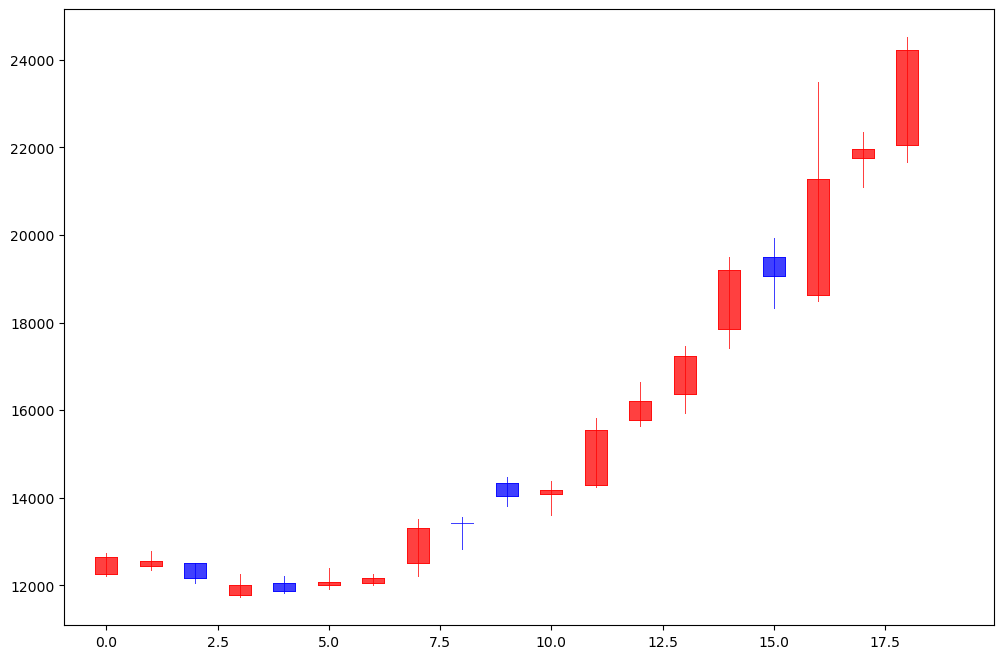

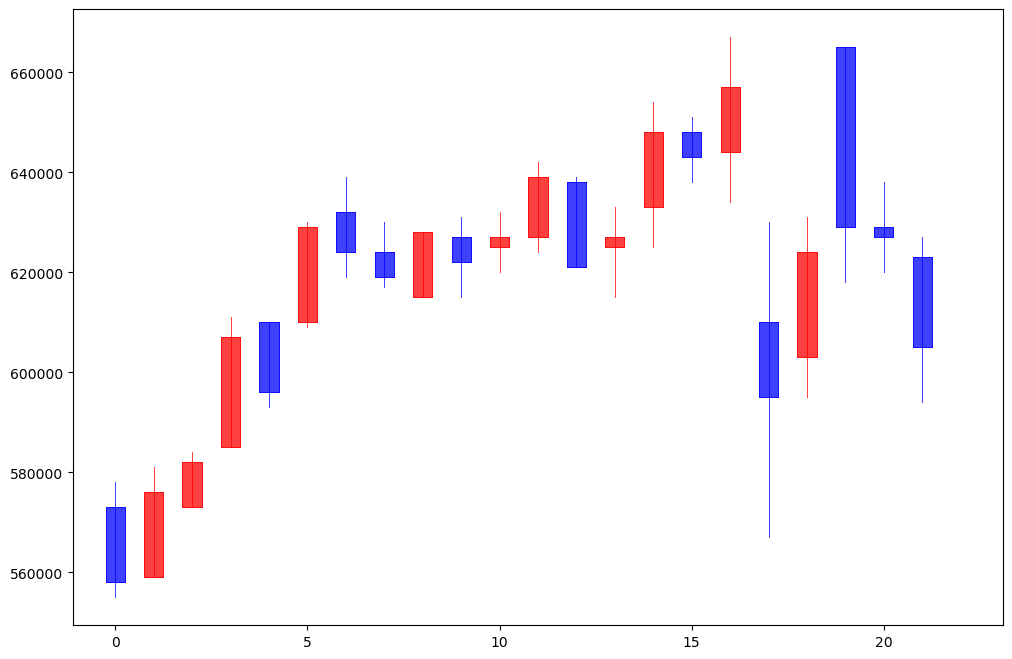

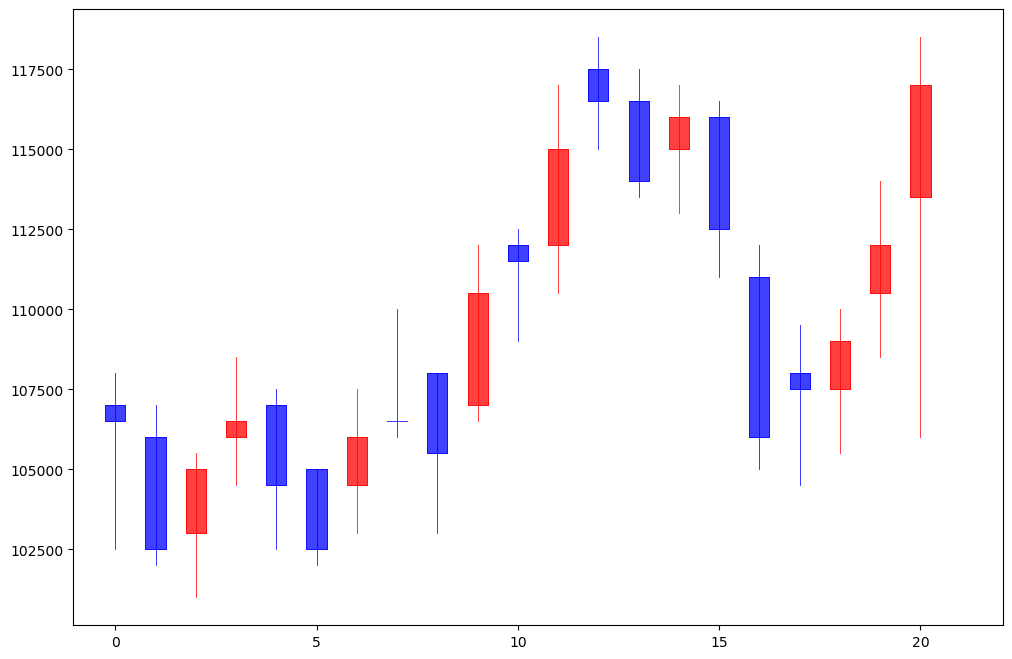

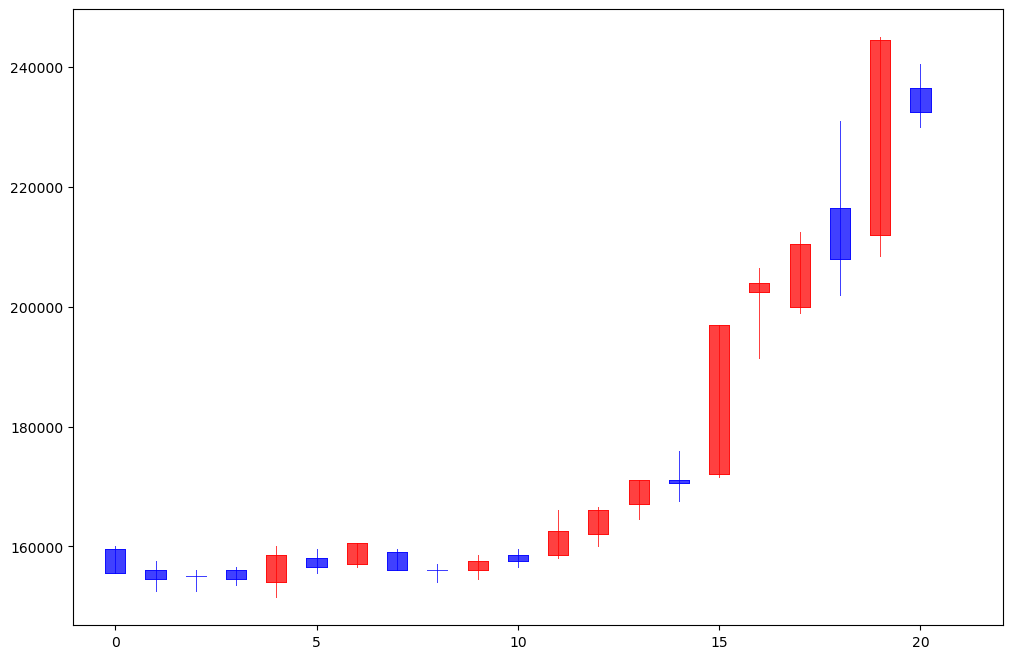

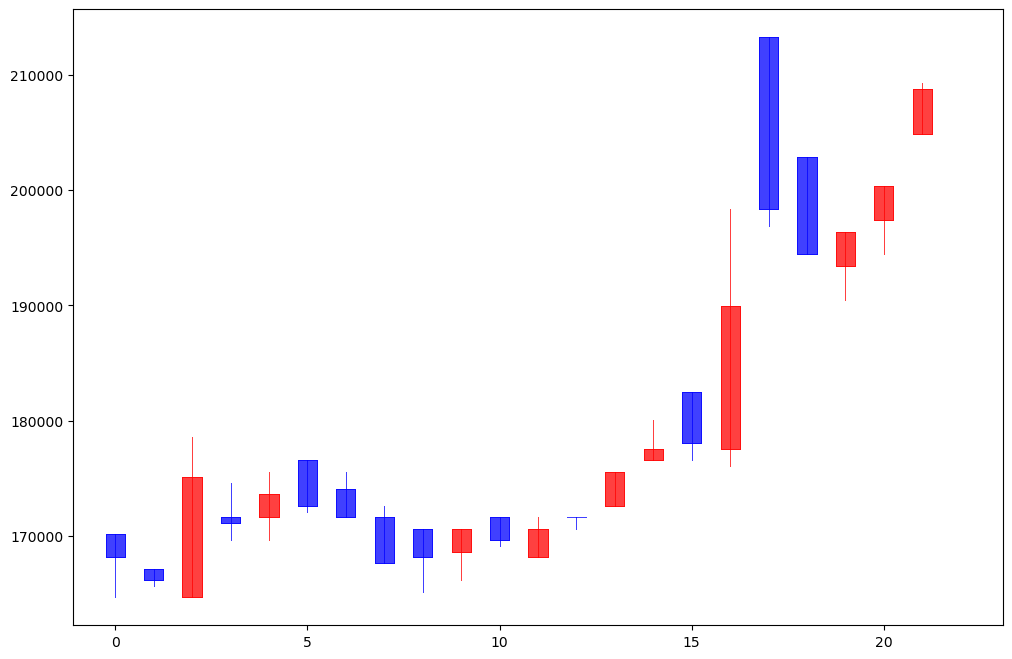

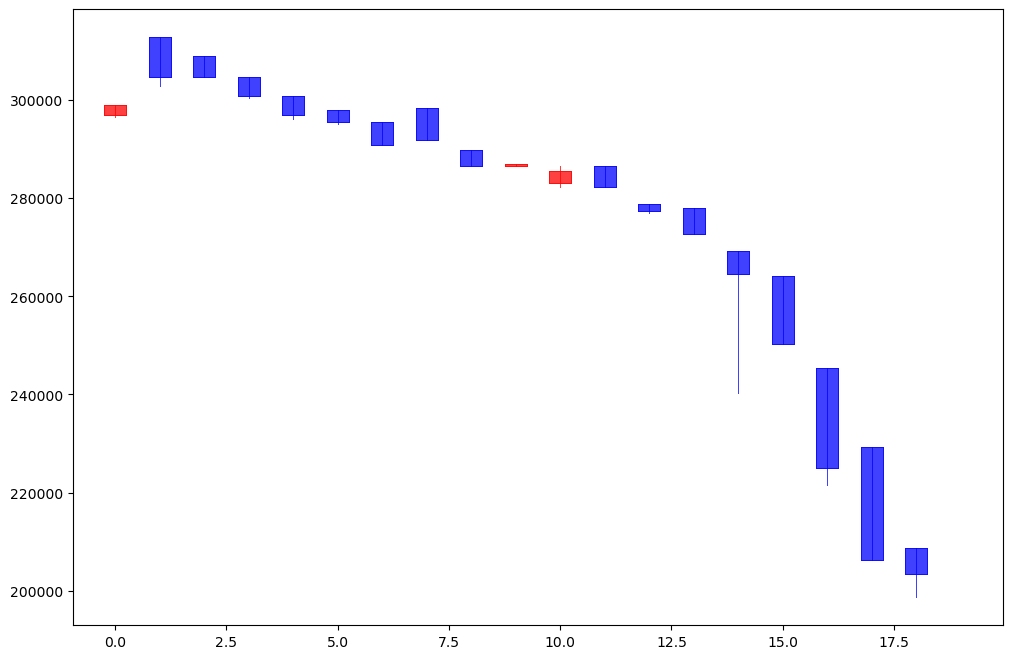

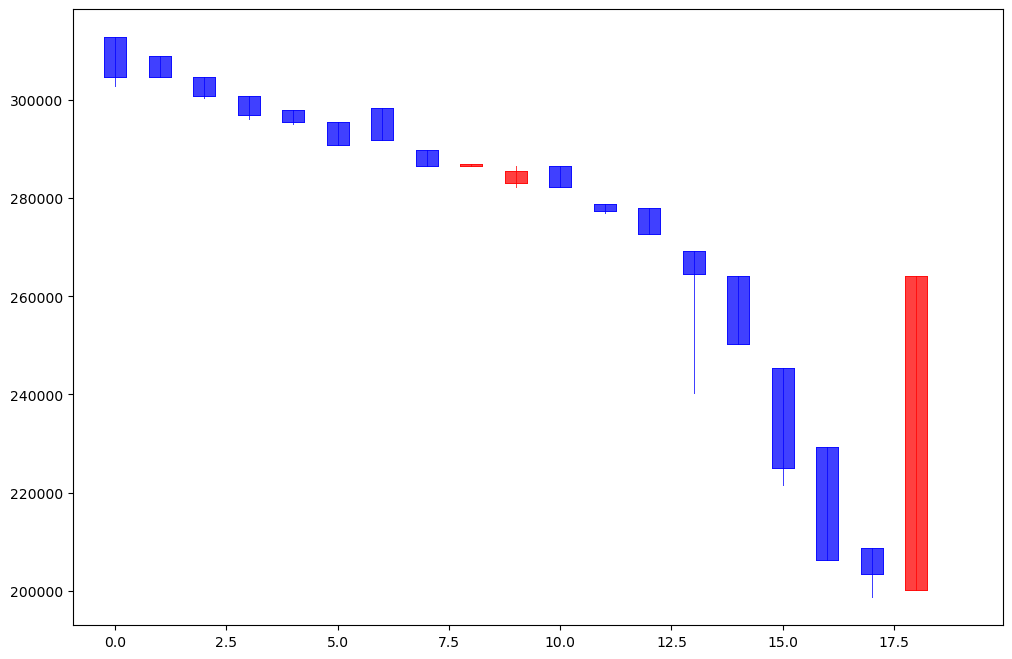

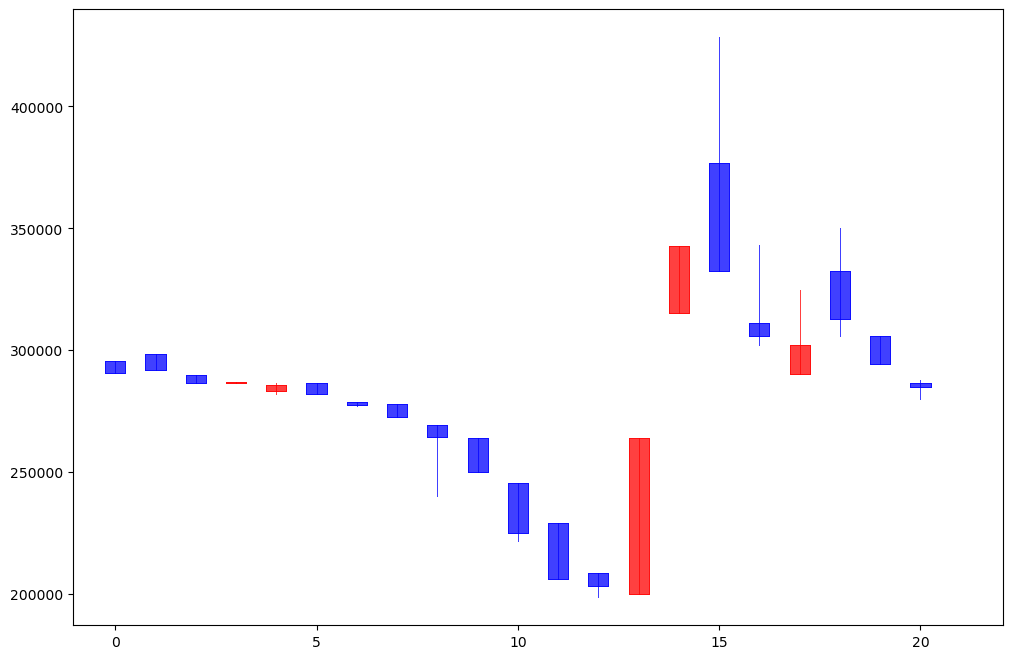

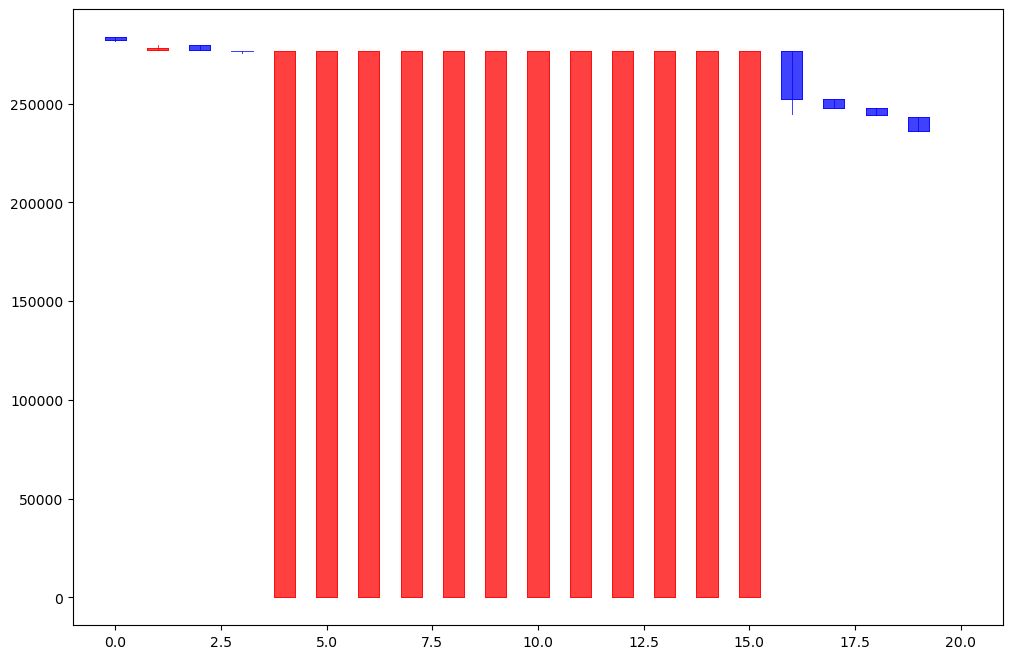

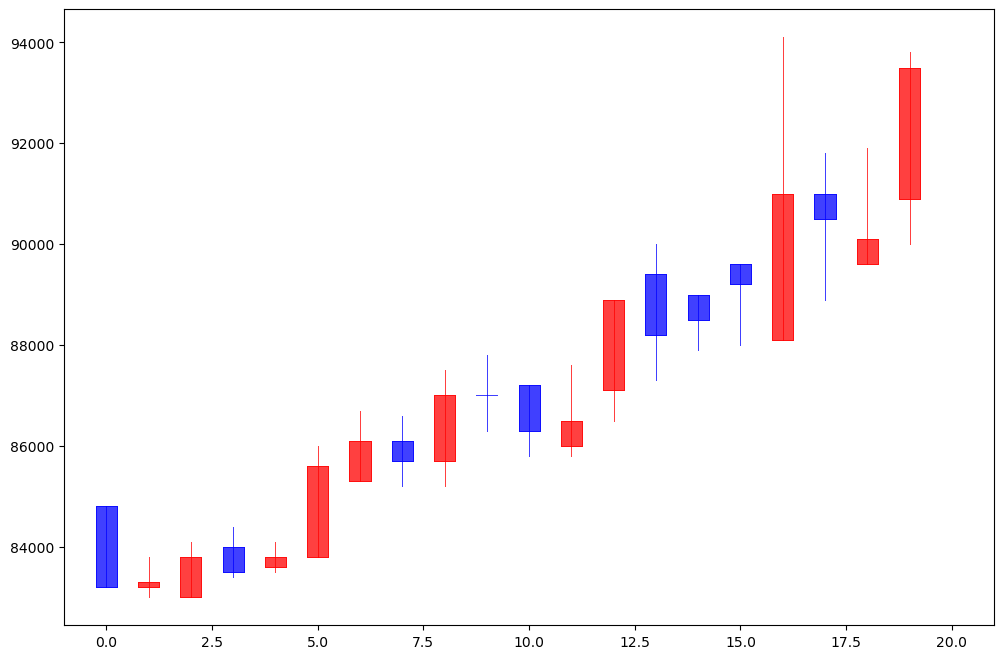

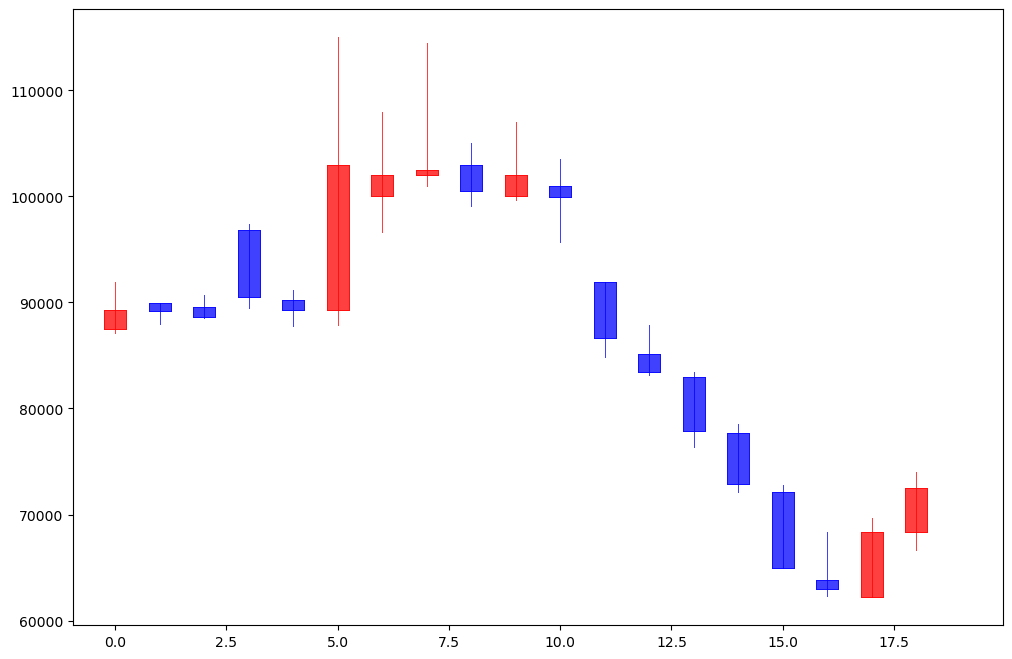

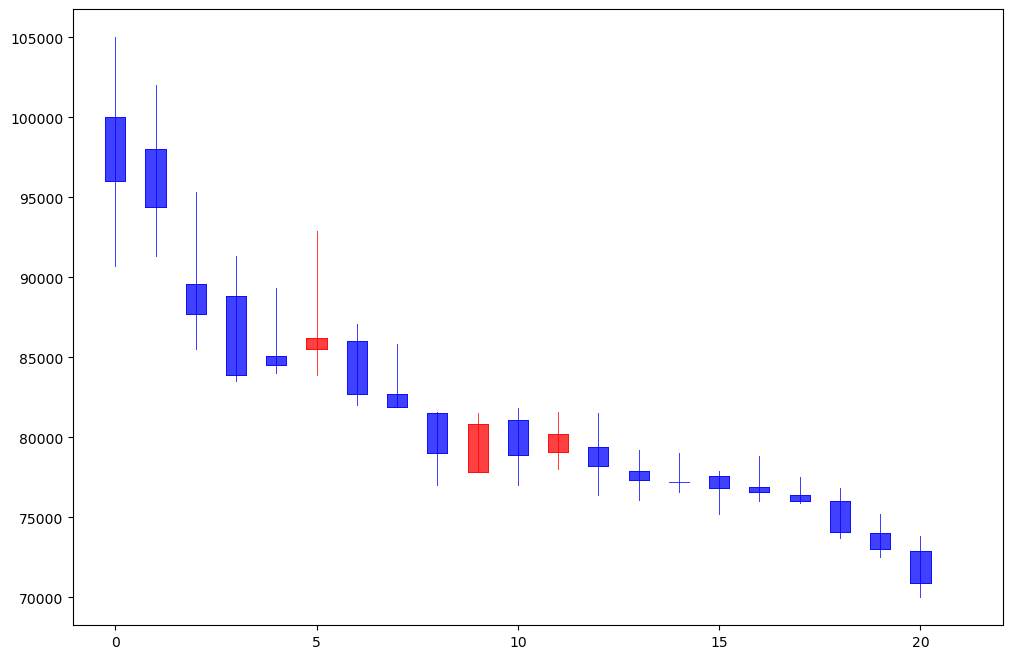

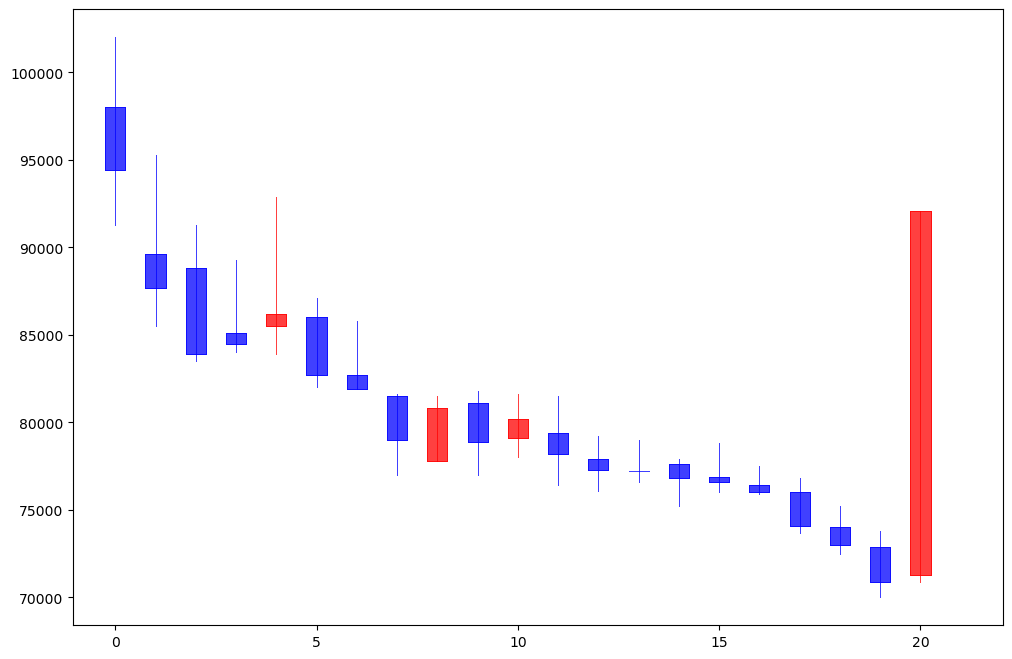

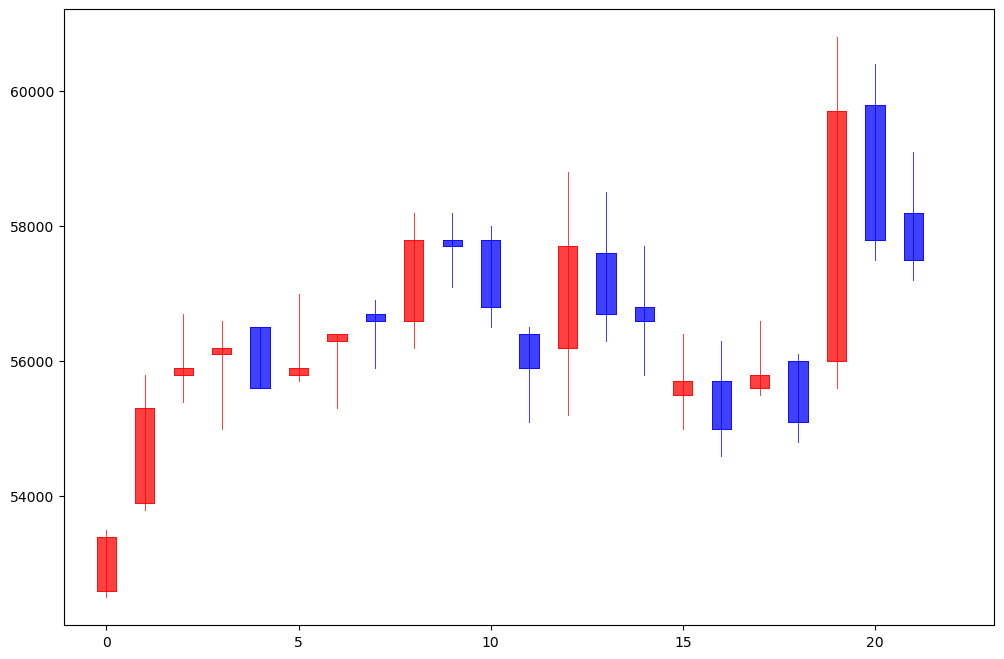

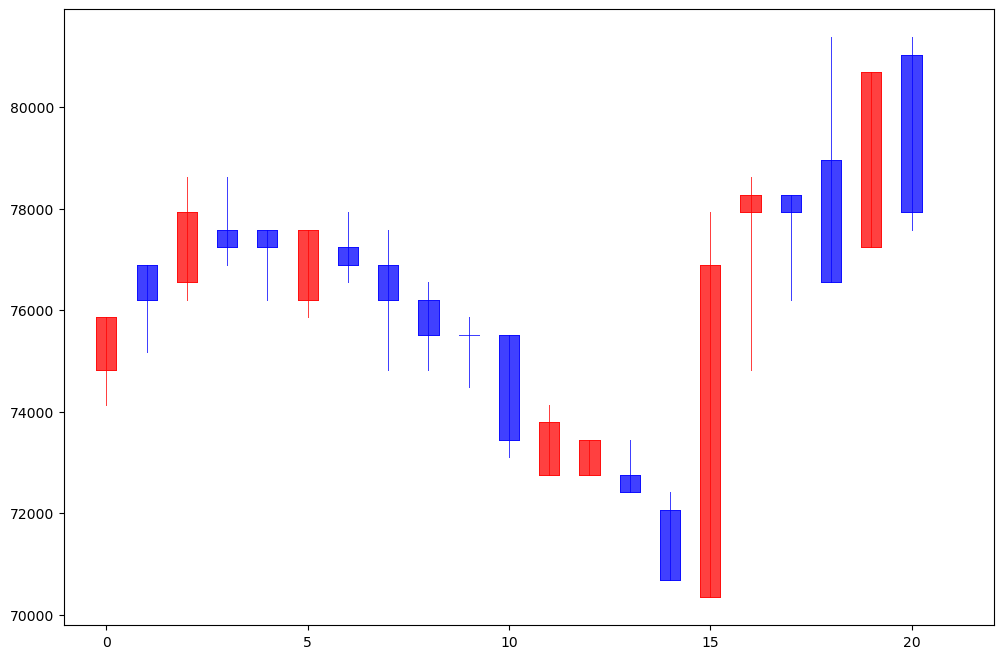

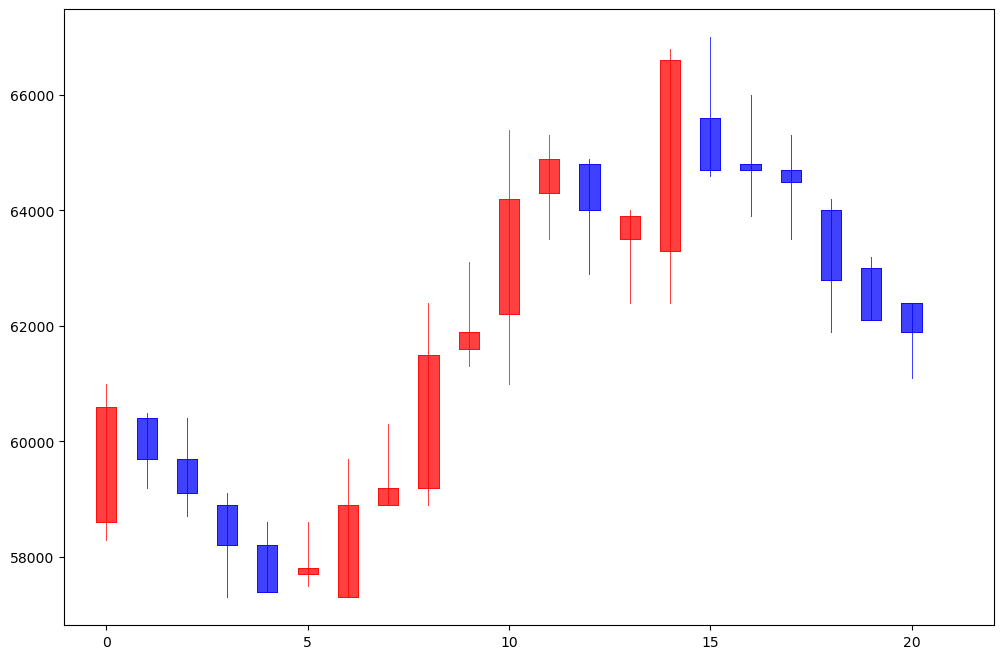

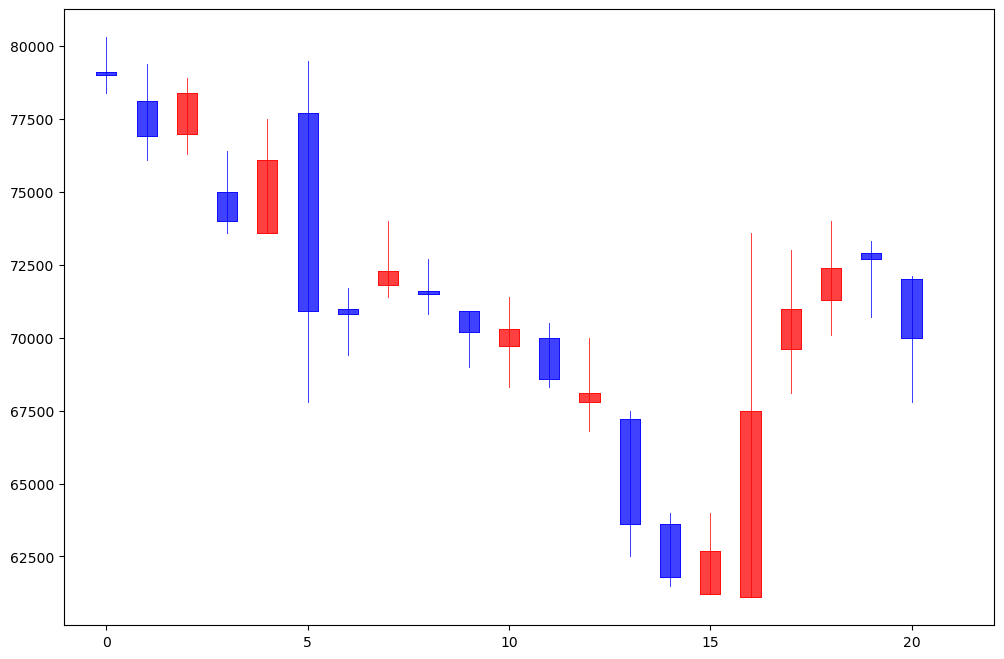

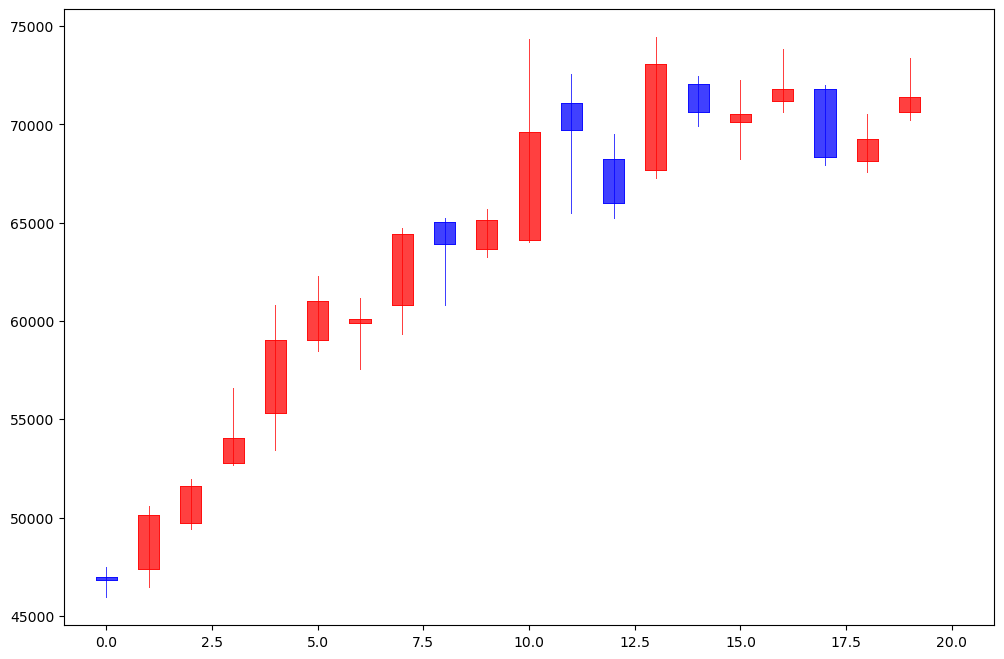

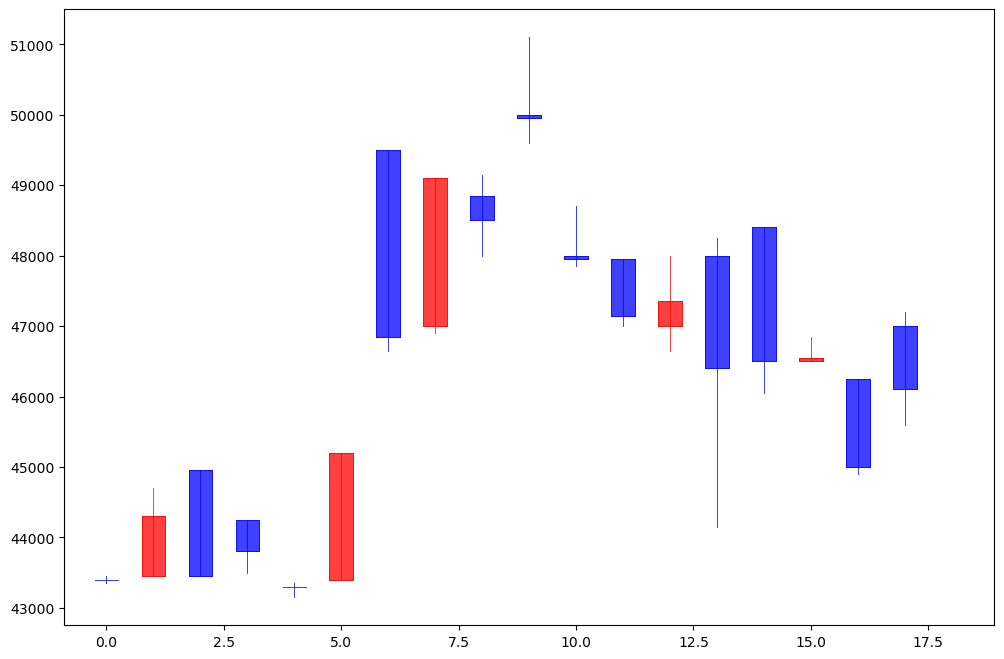

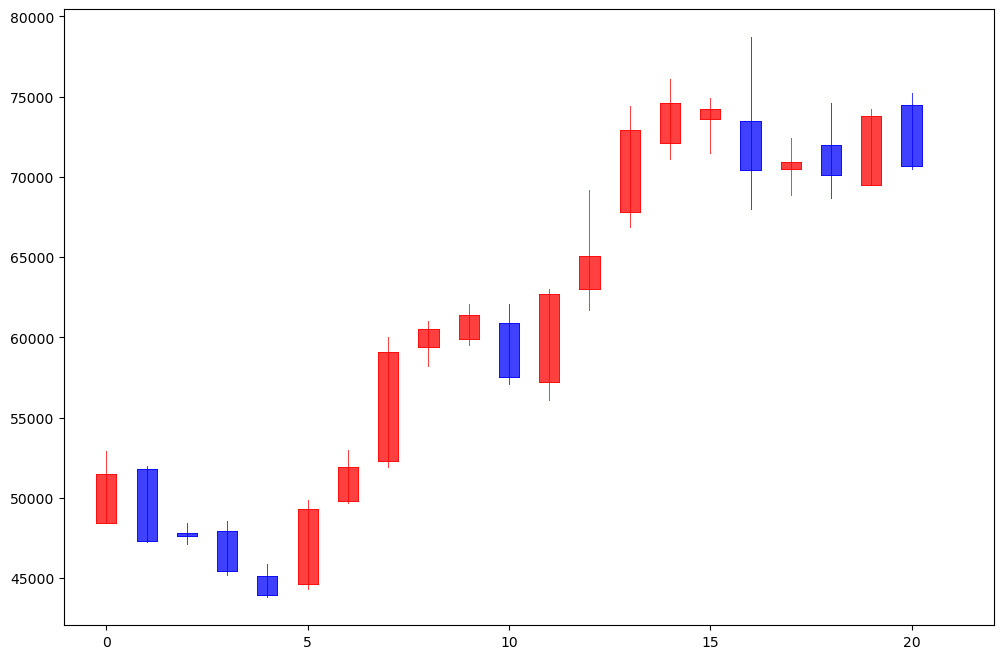

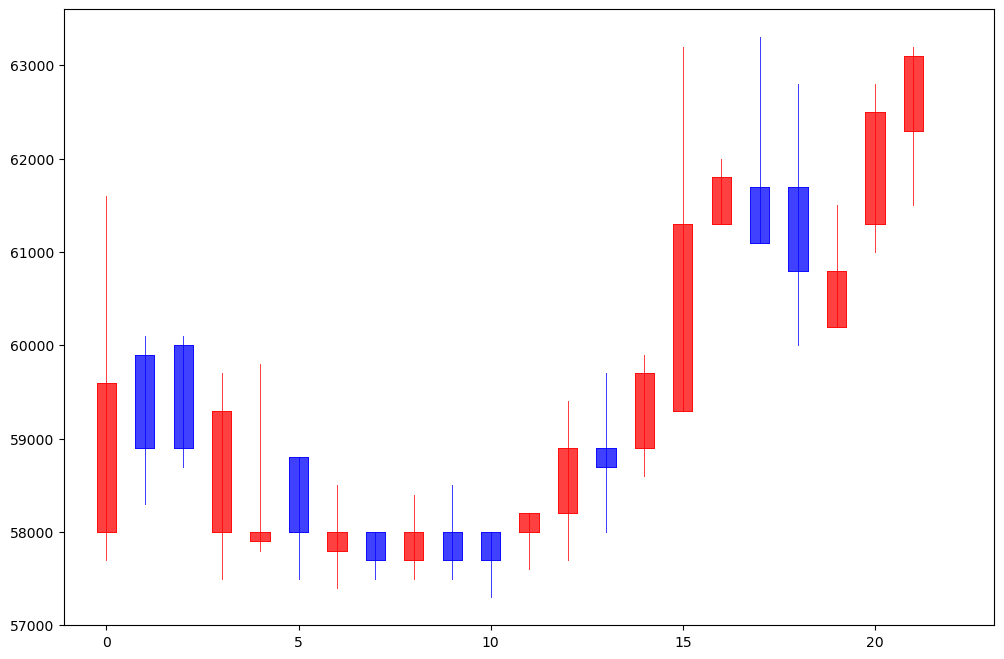

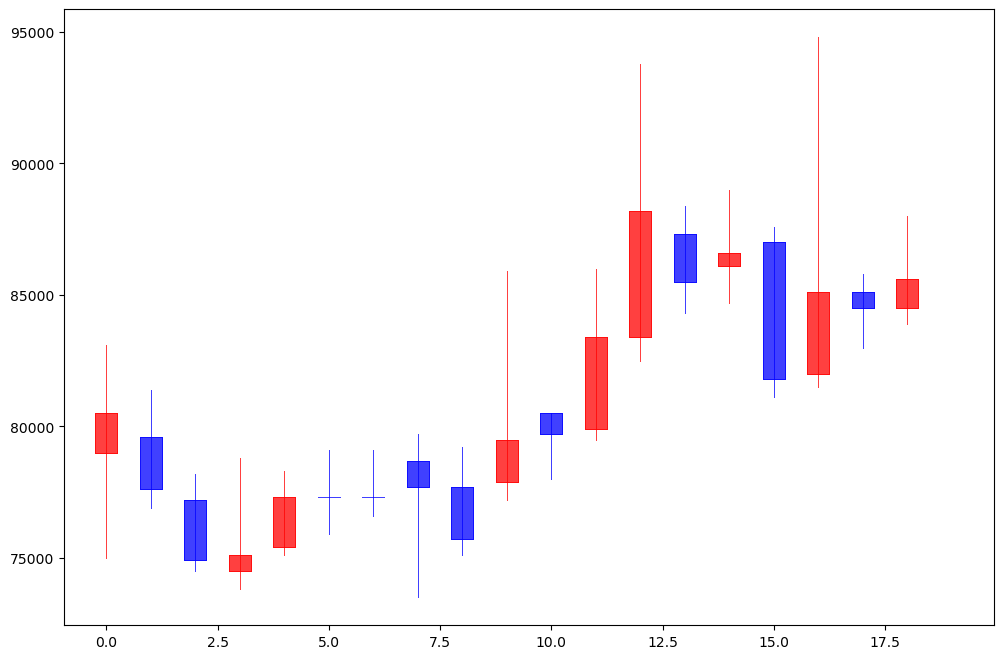

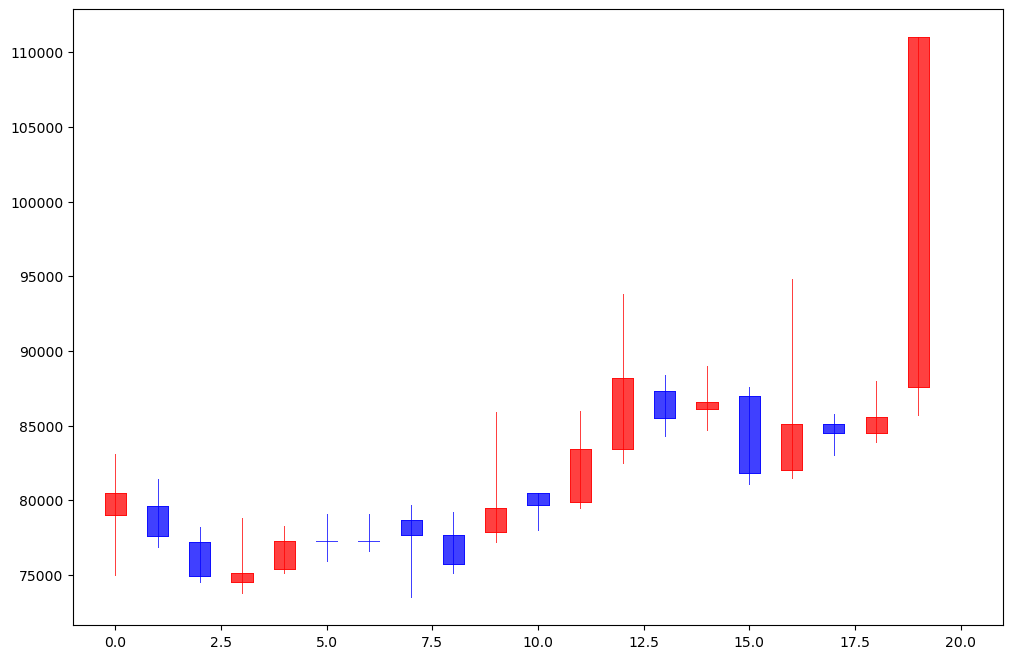

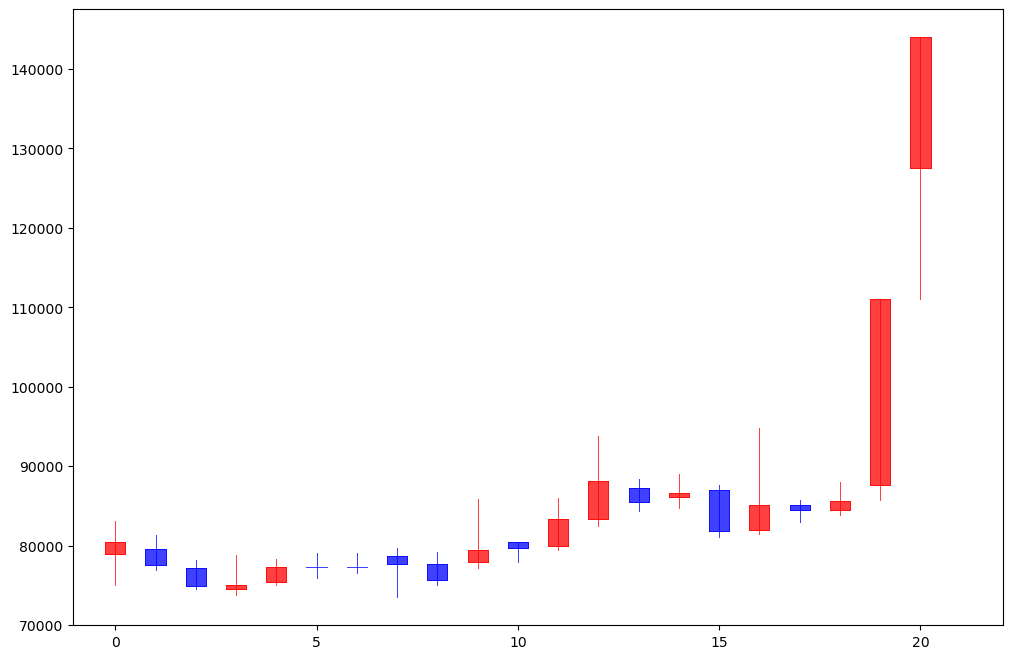

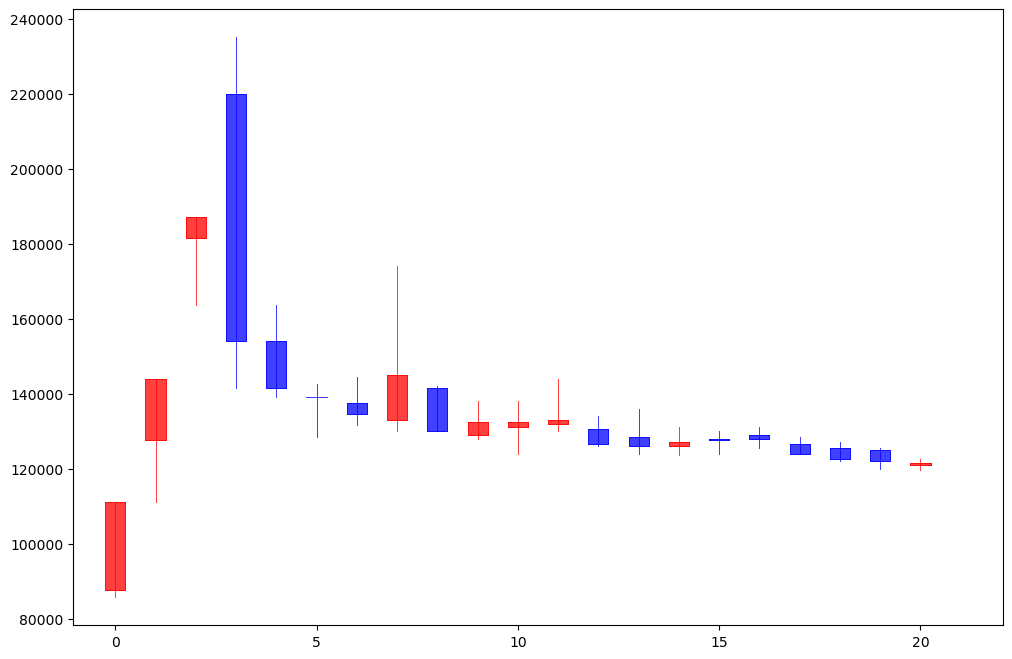

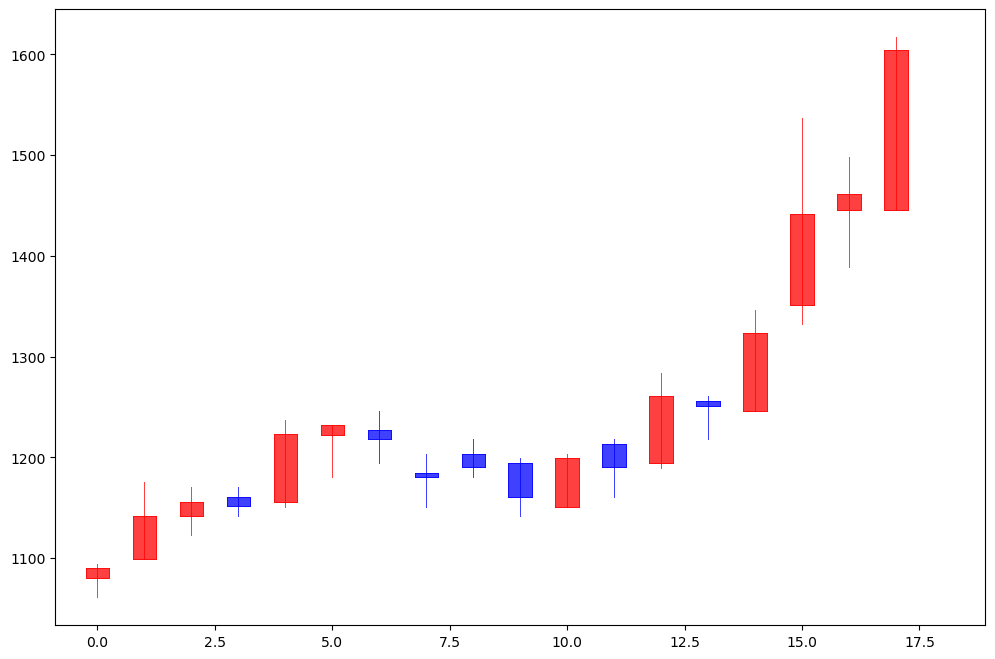

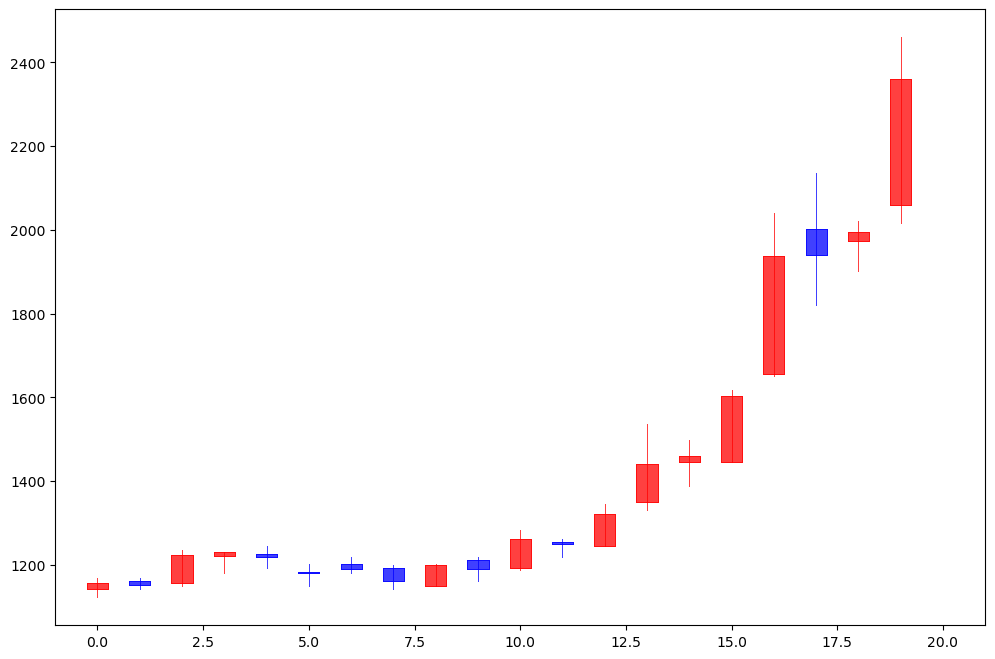

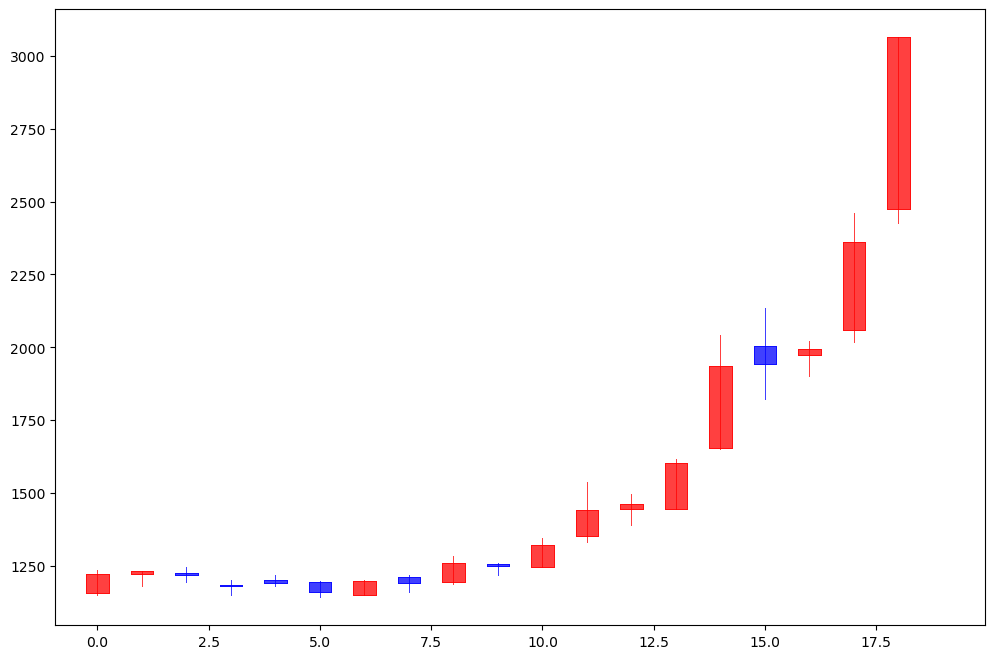

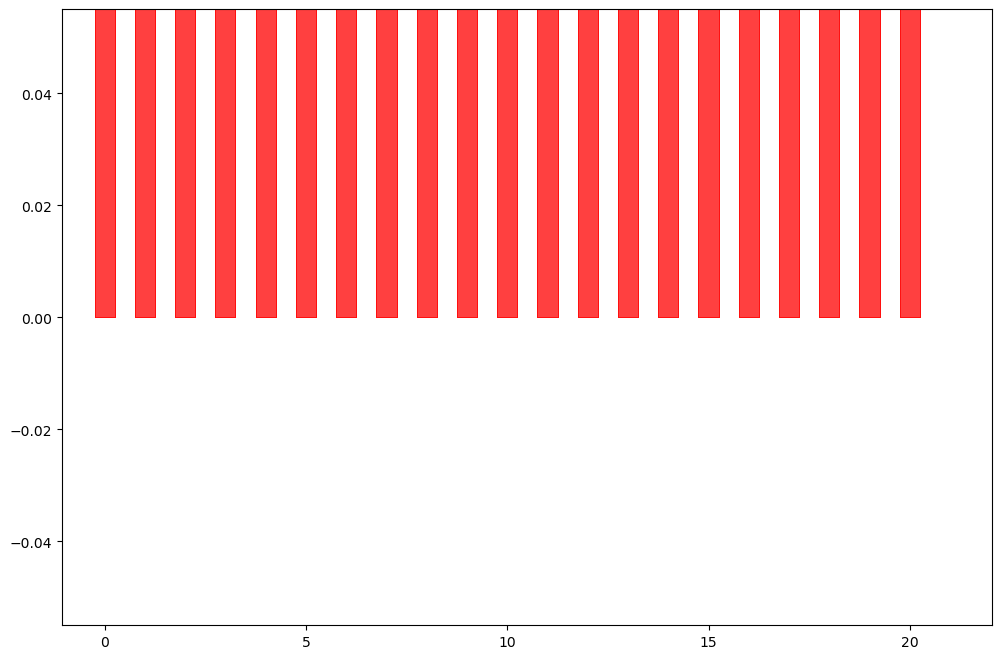

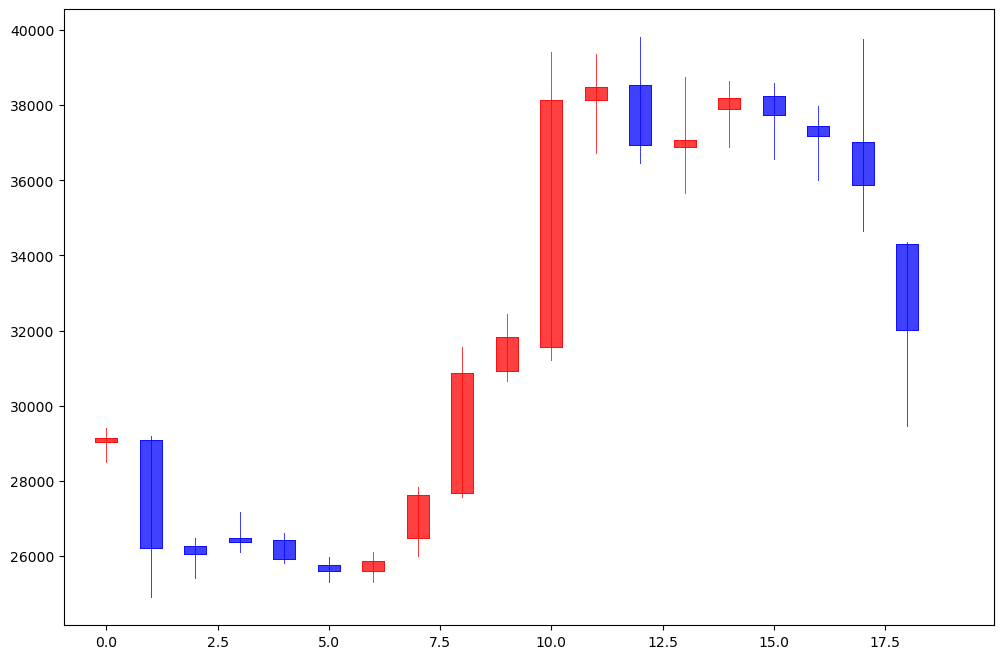

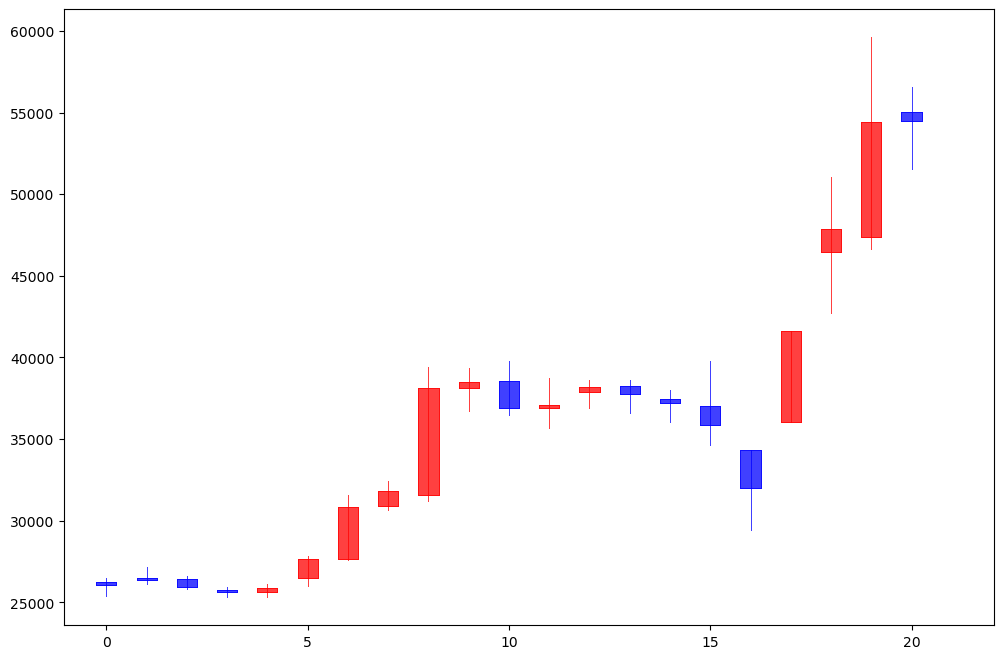

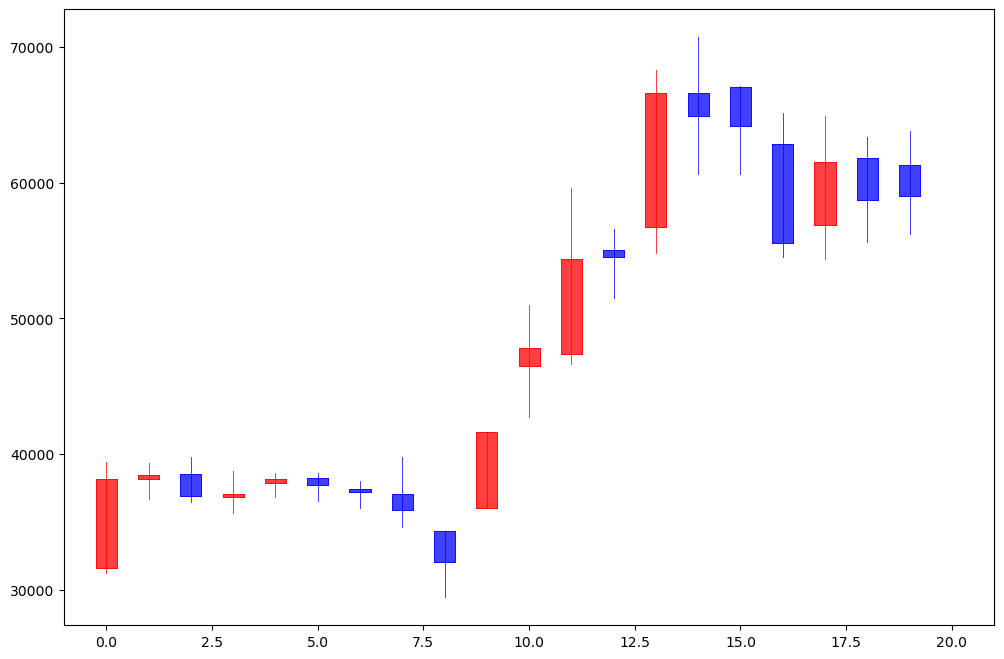

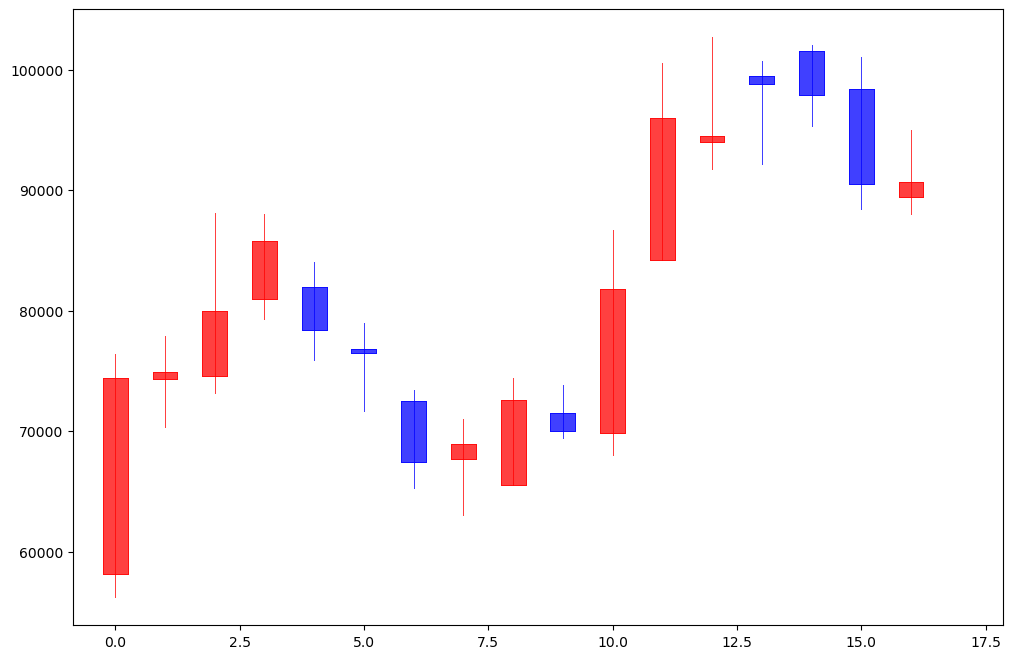

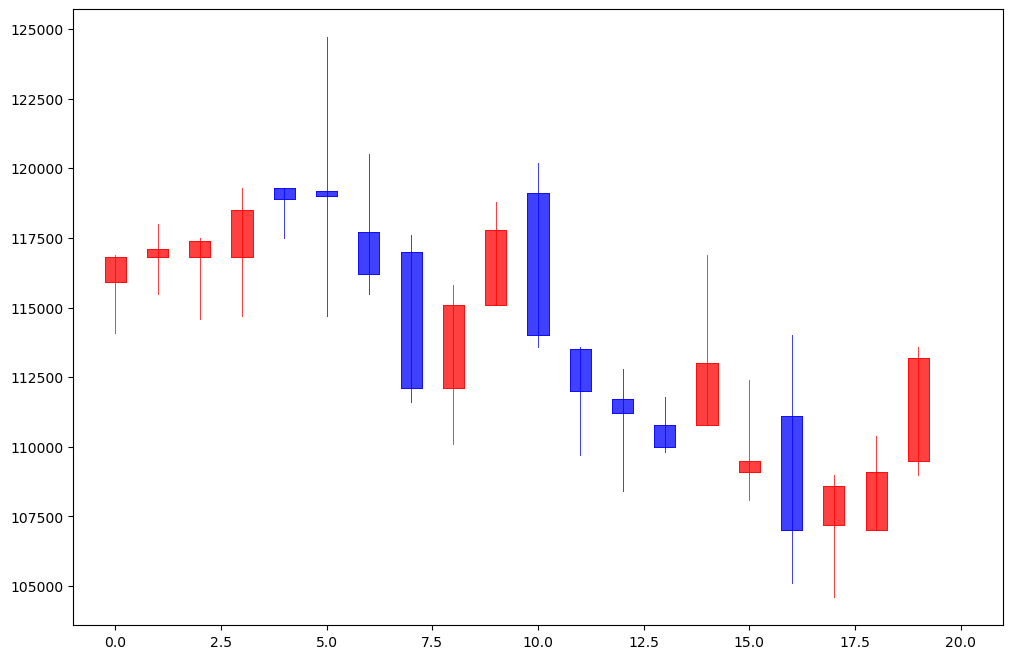

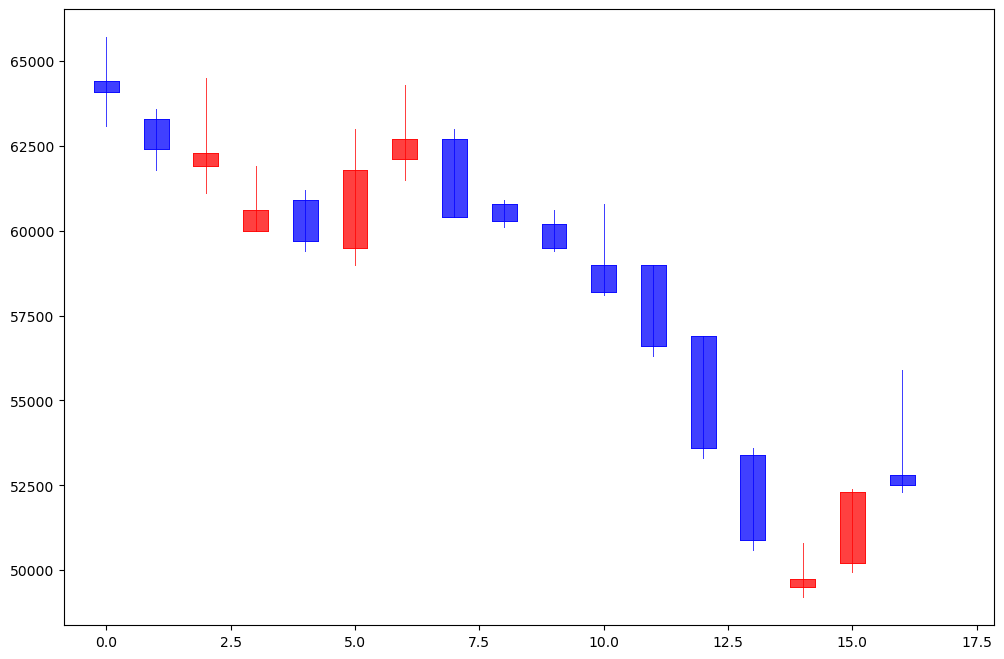

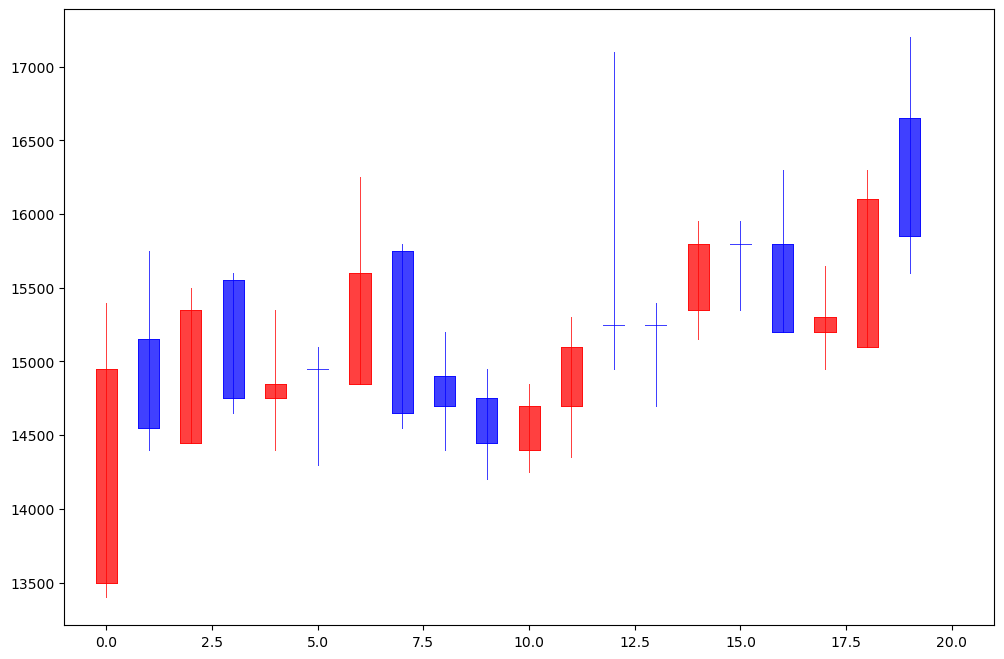

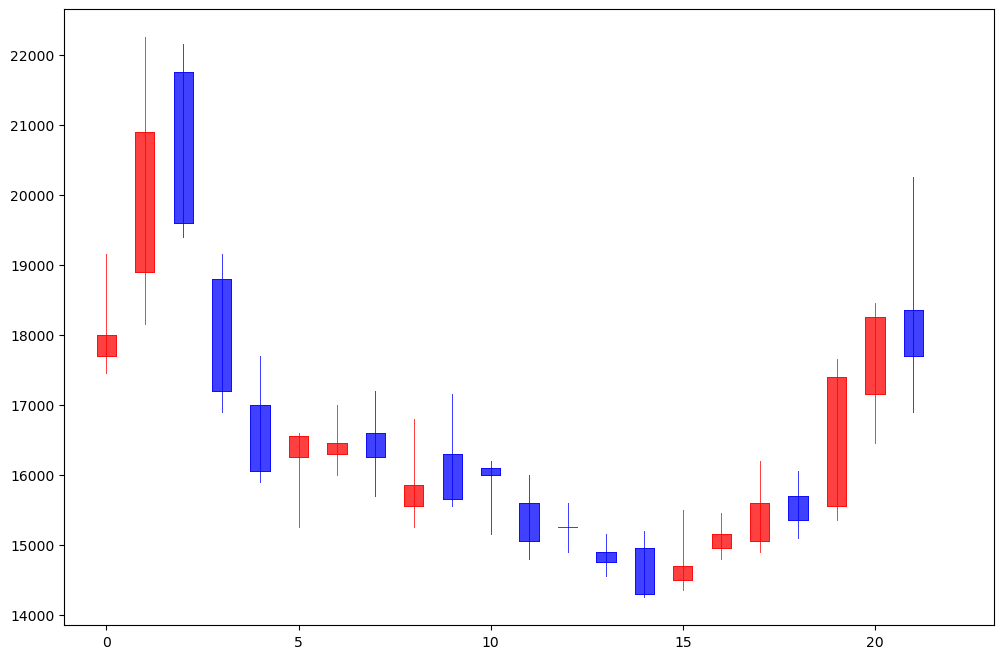

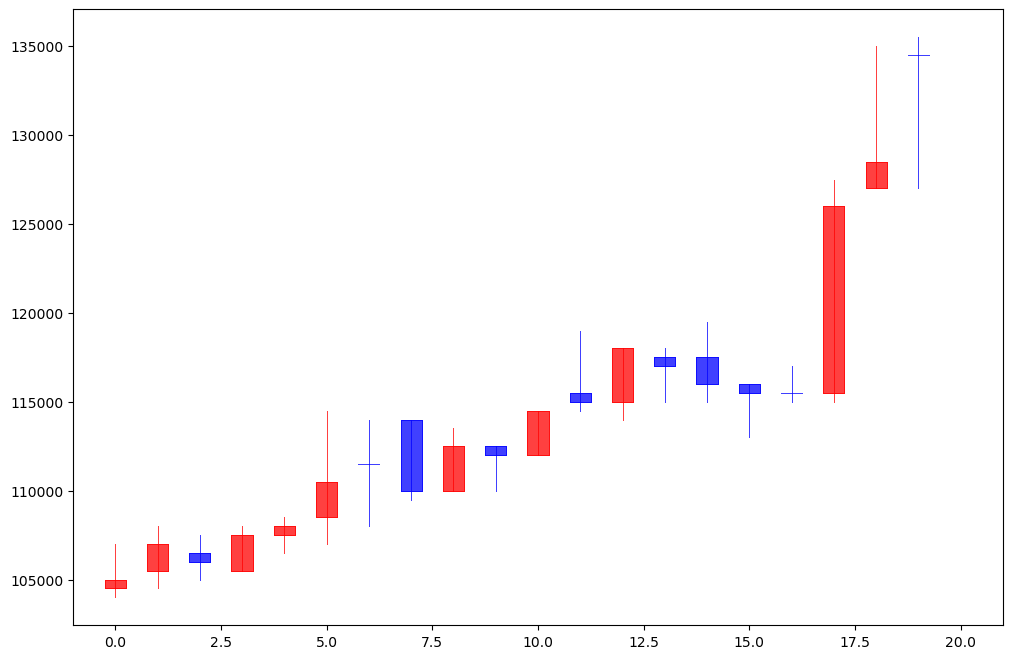

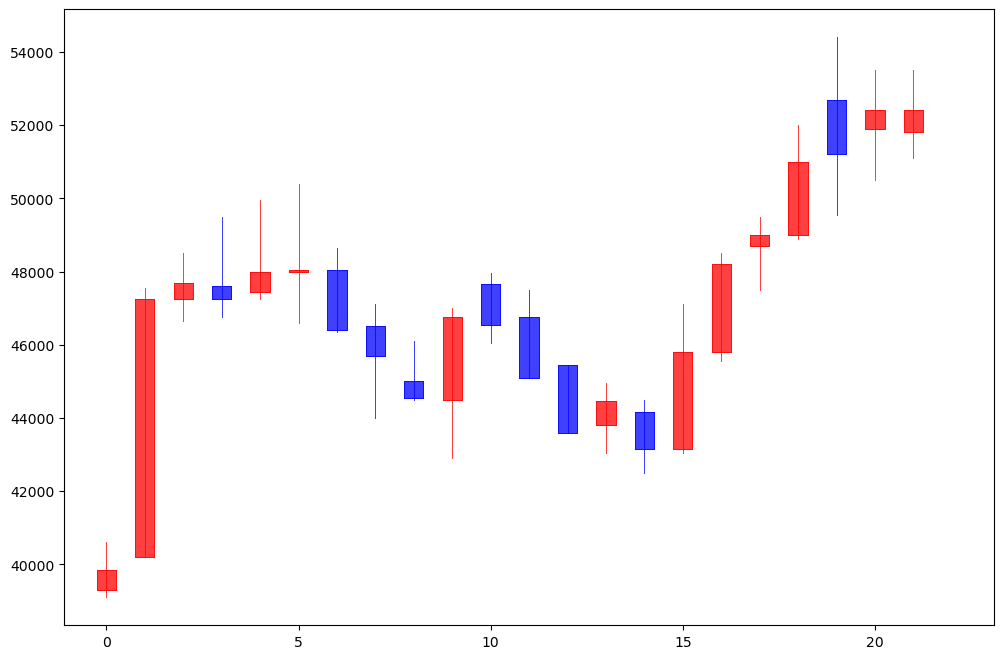

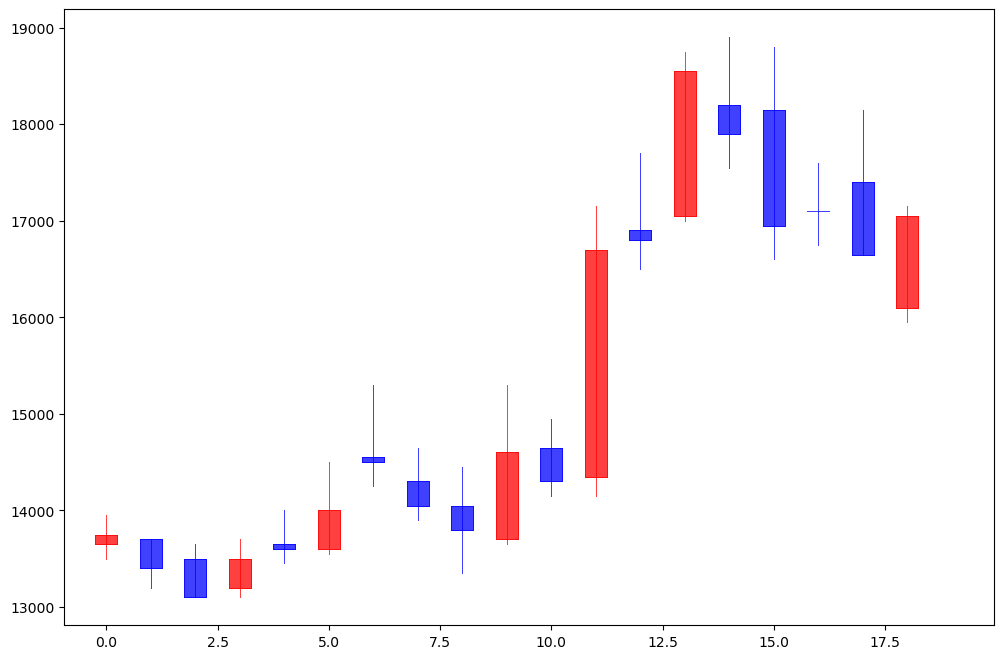

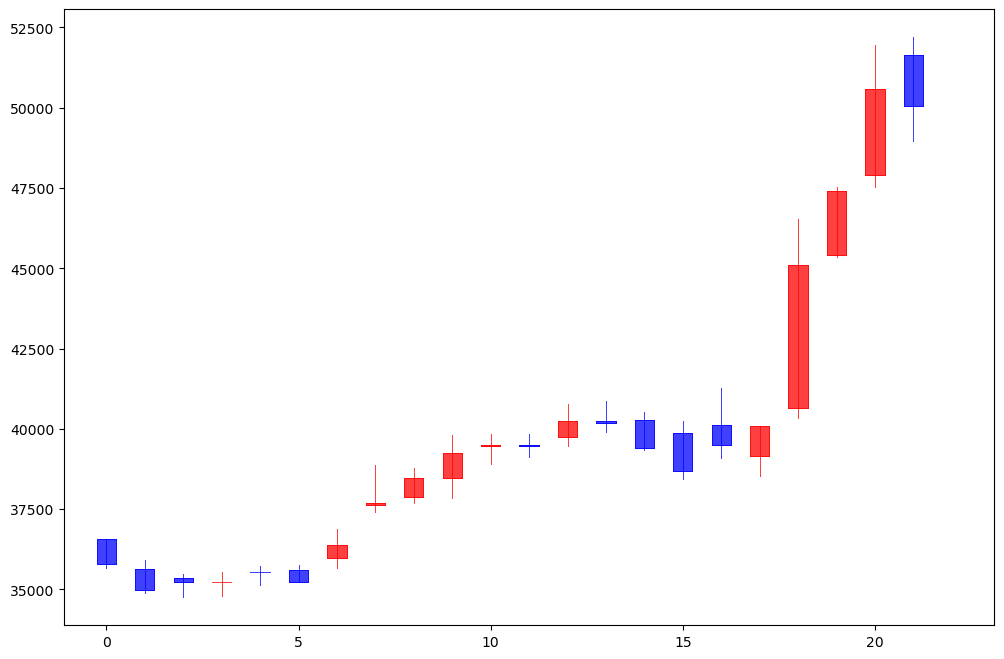

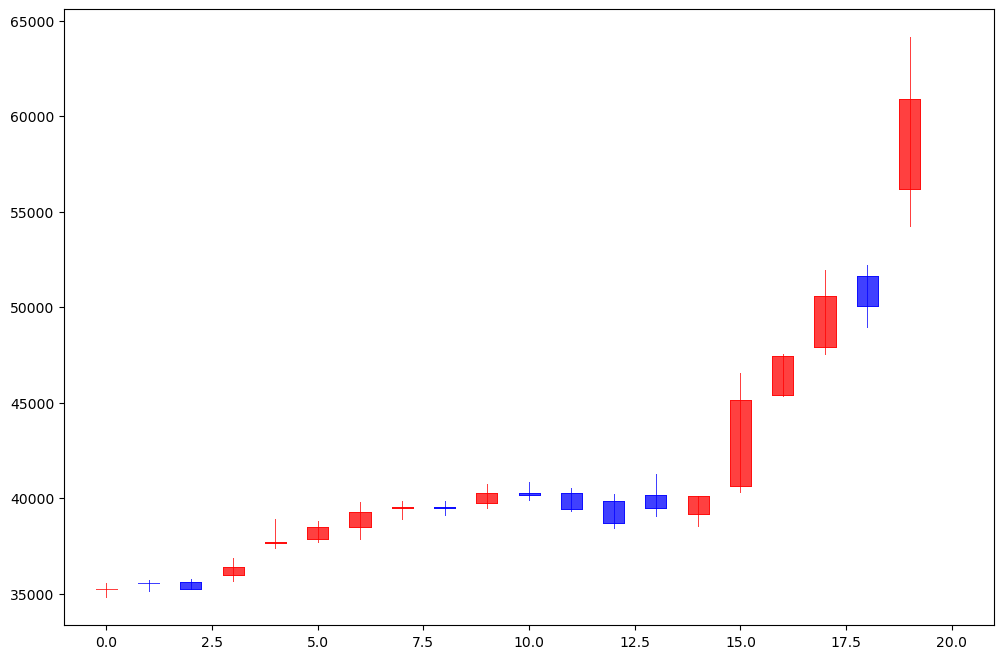

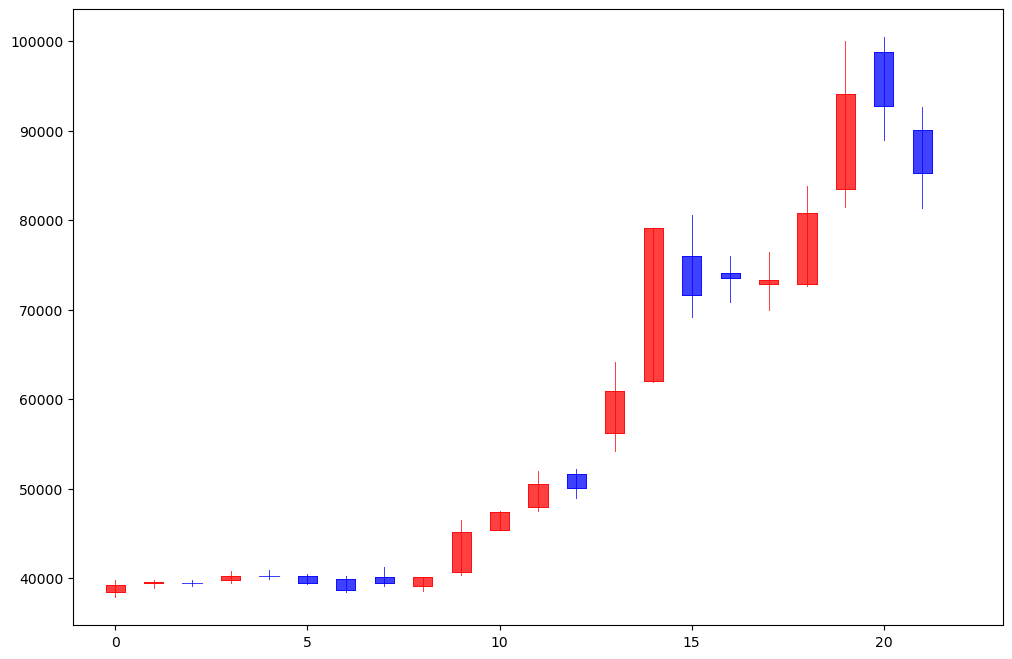

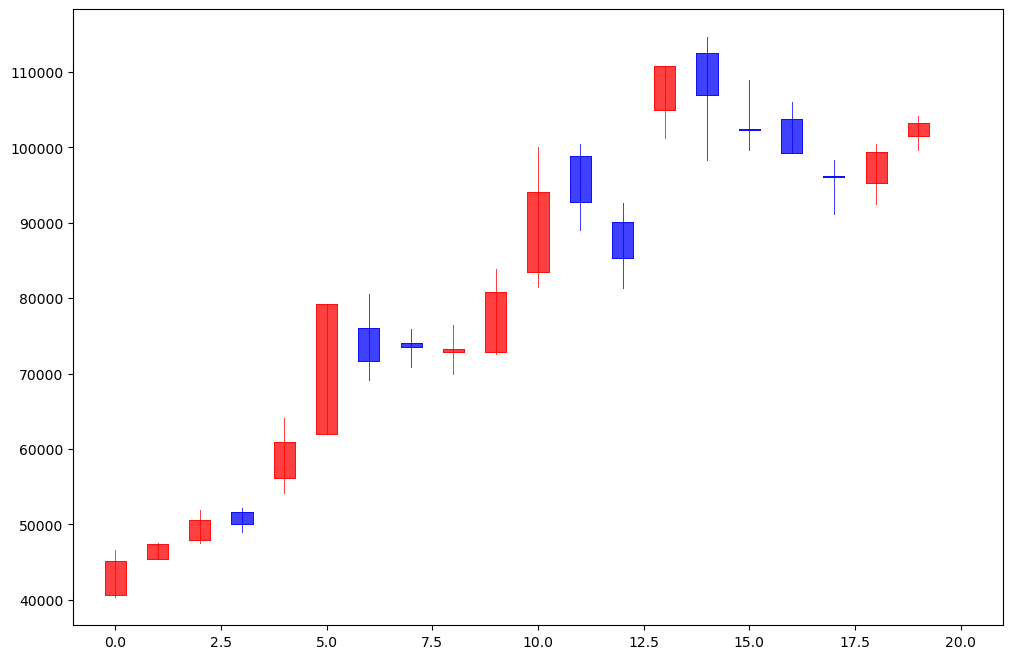

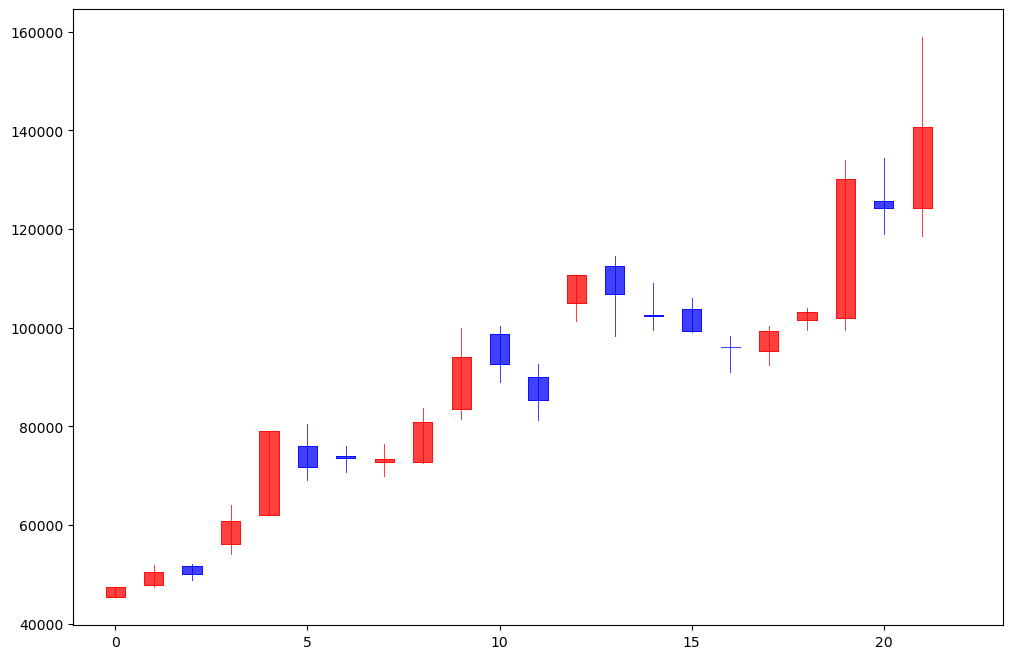

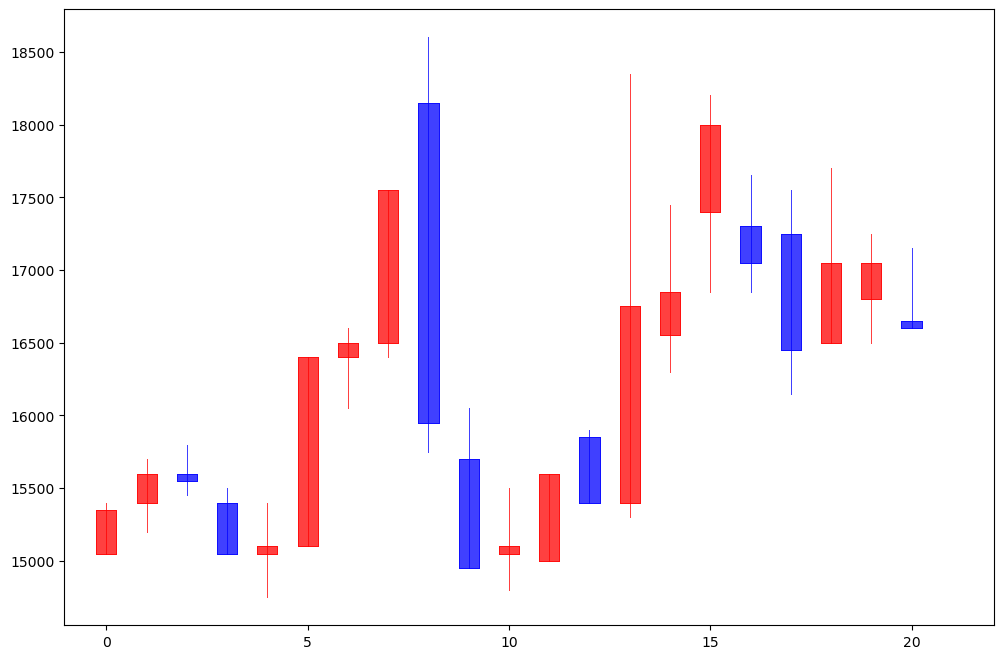

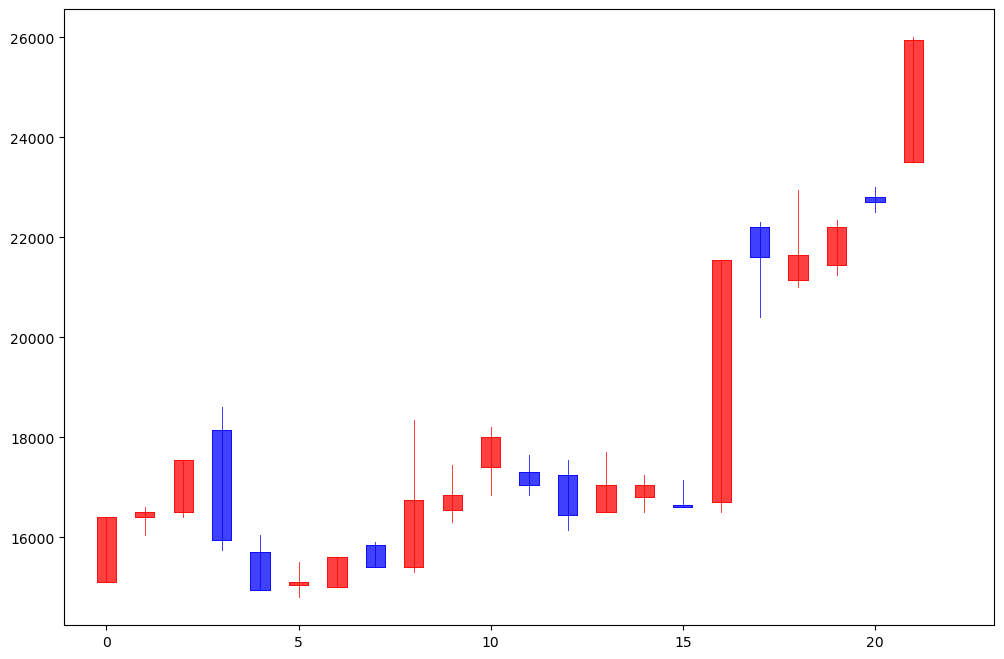

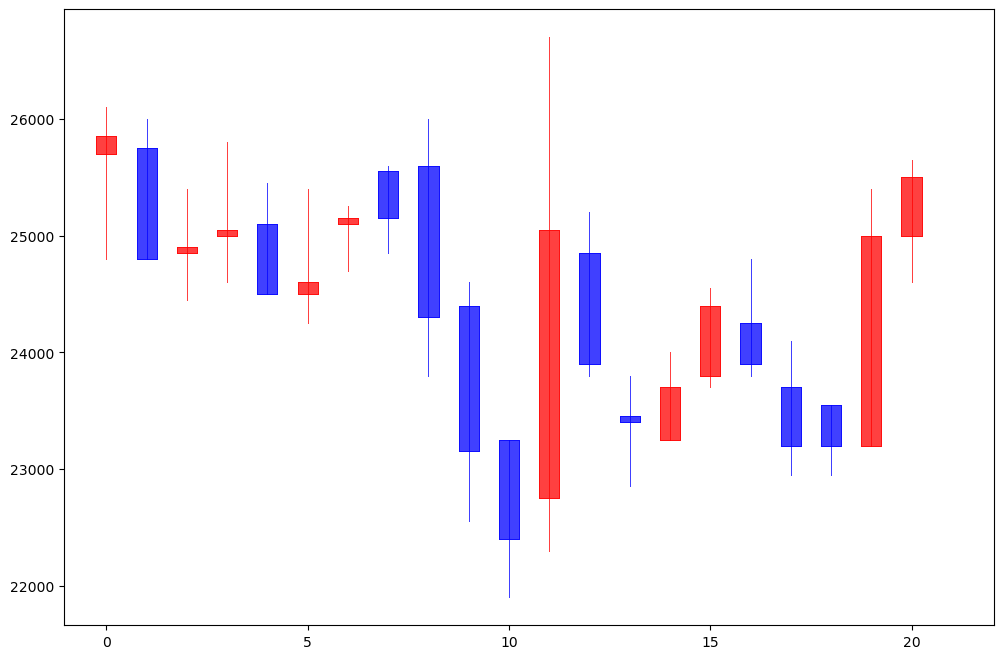

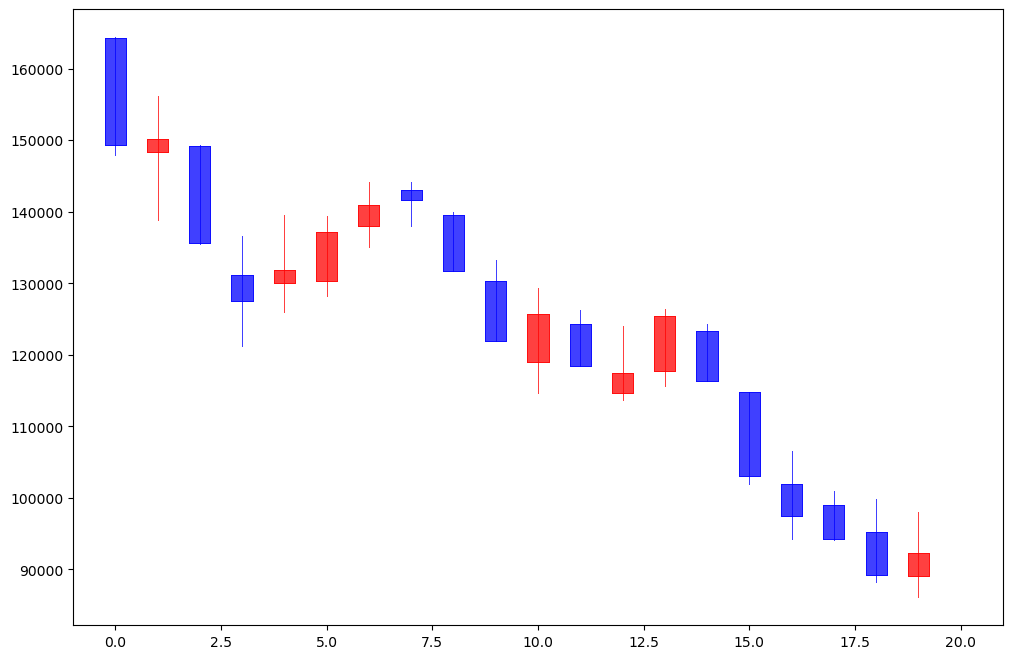

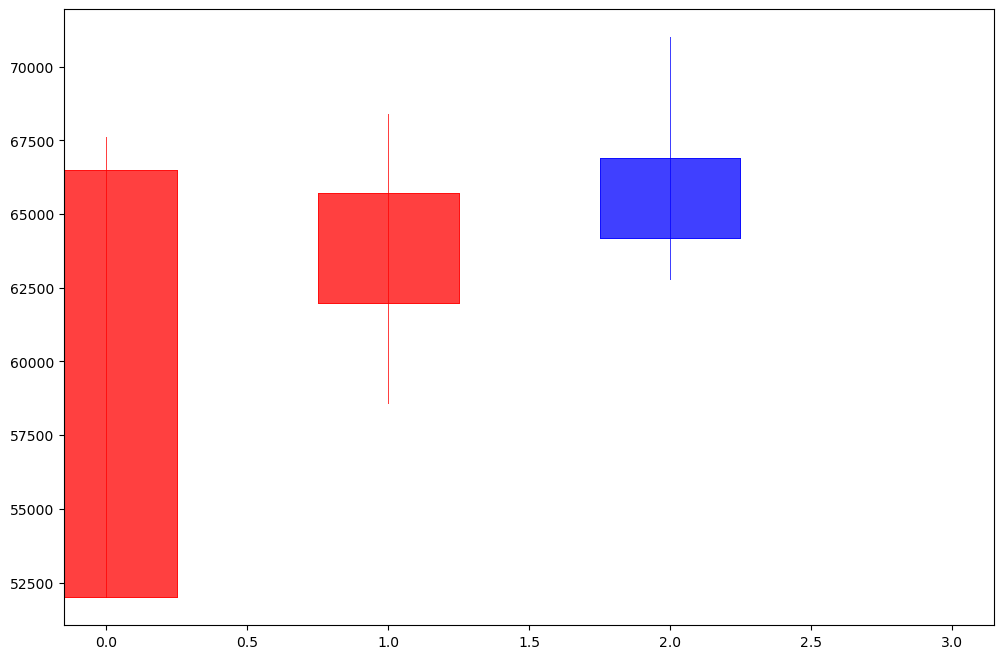

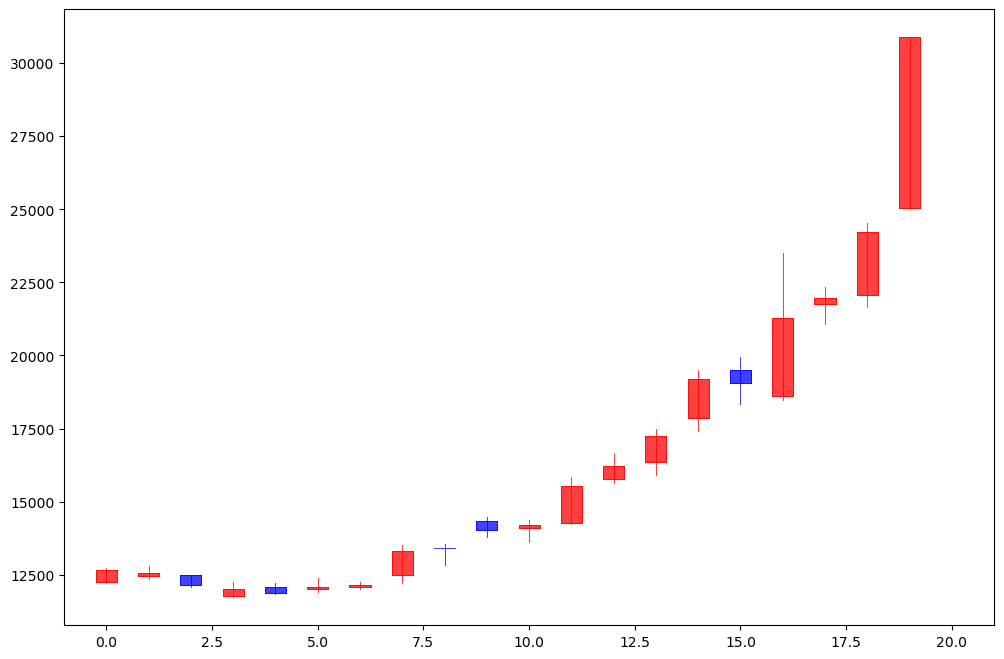

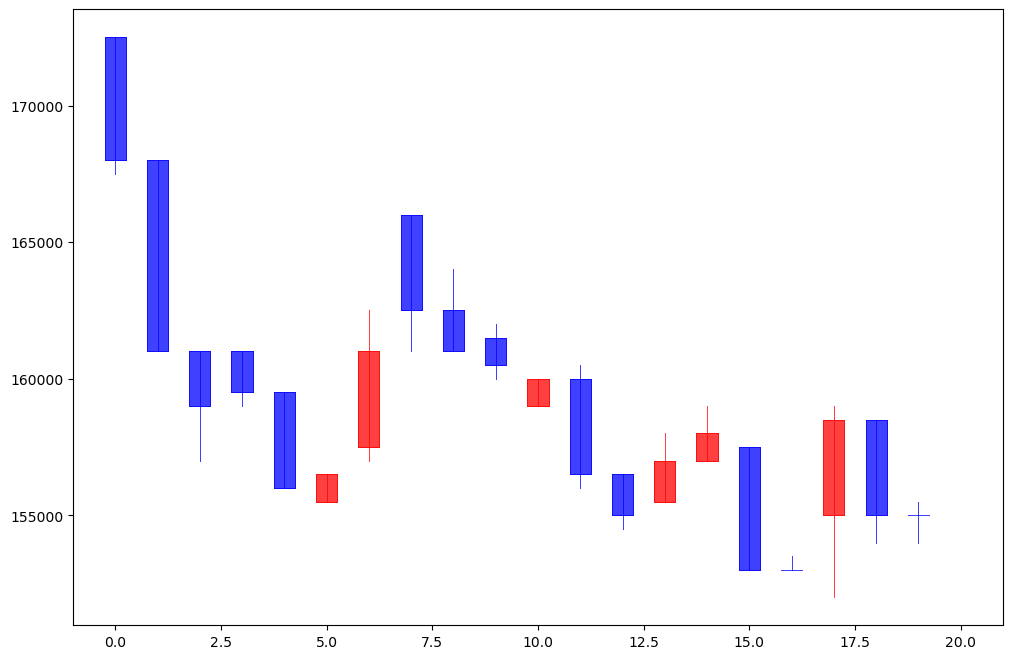

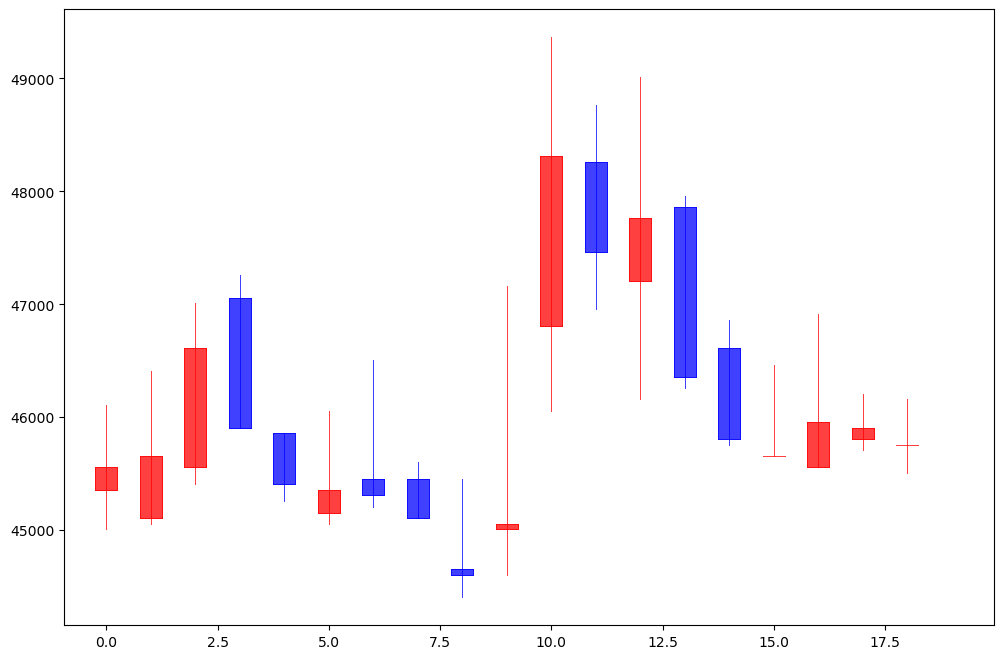

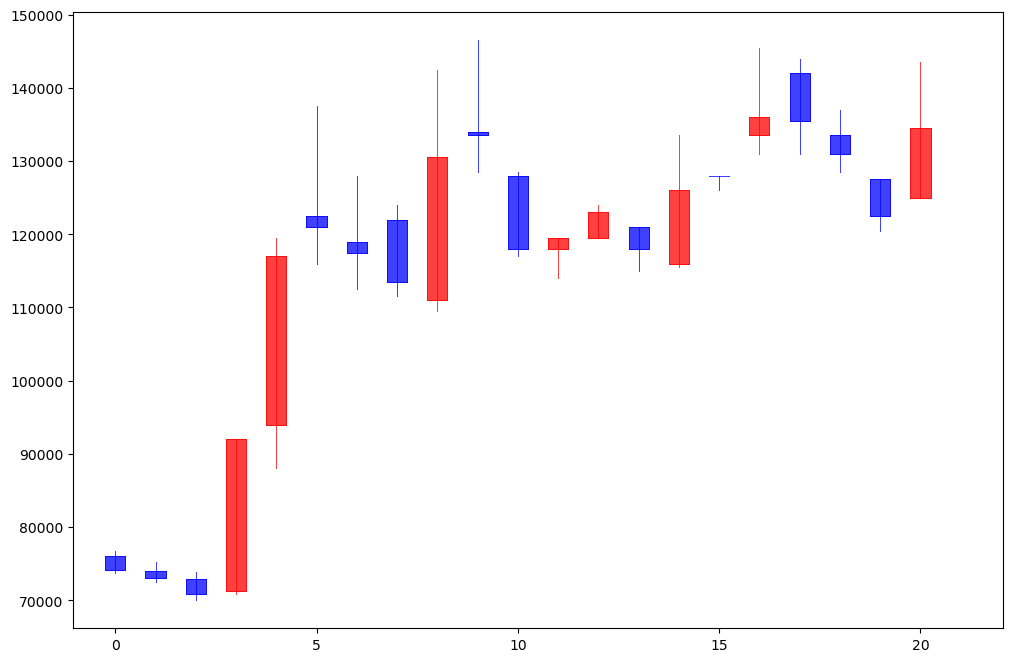

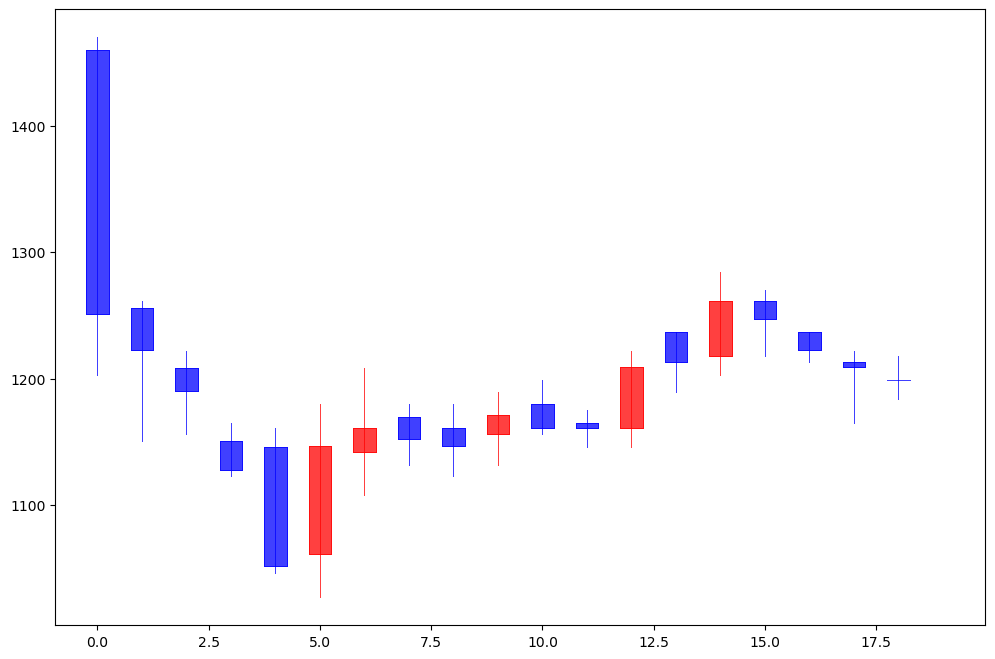

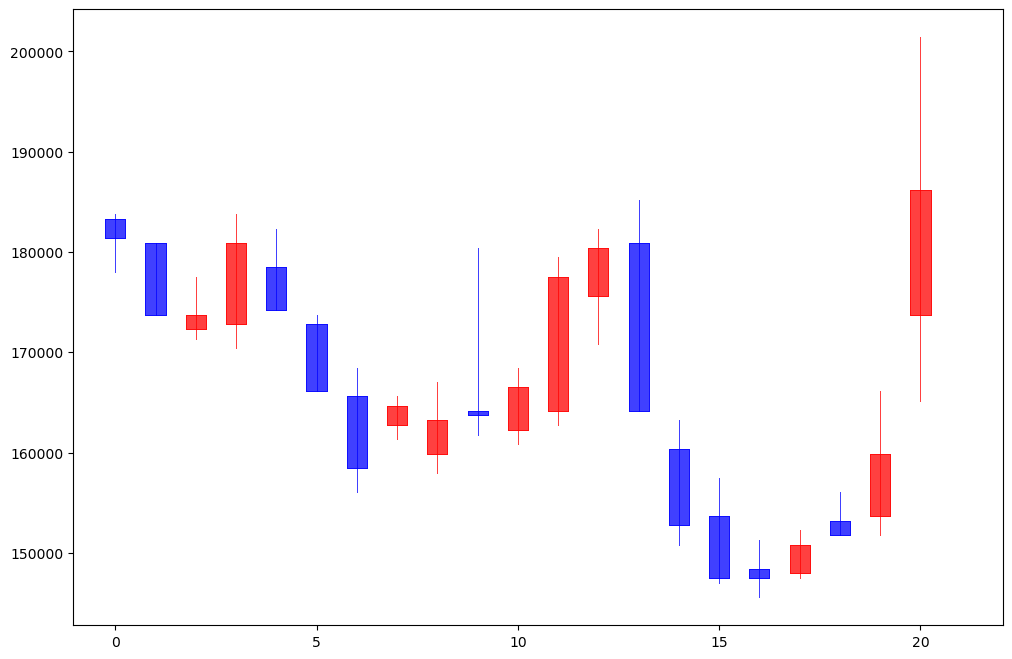

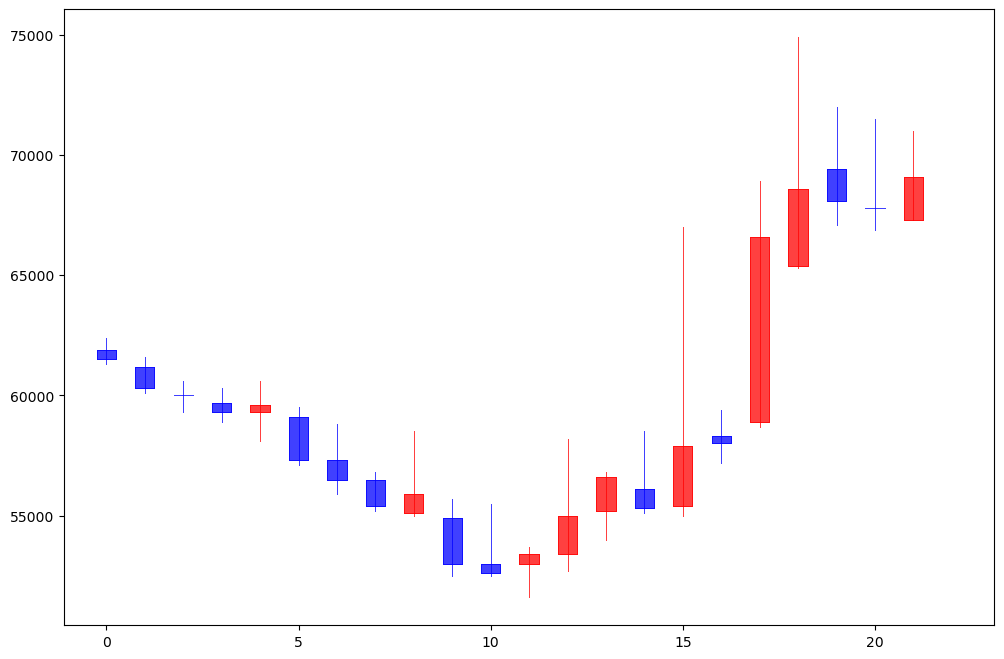

In [319]:
for index, row in stock.iterrows():
    start_date = add_days_to_date(row['date'], 30)
    end_date = add_days_to_date(row['date'], 1)
    
    skhynix = stock_e[(stock_e['날짜'] >= start_date) & (stock_e['날짜'] <= end_date)]
    skhynix = skhynix[skhynix['trick'] == row['trick']]
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    mpl_finance.candlestick2_ohlc(ax, skhynix['시가'], skhynix['고가'], skhynix['저가'], skhynix['종가'], width=0.5, colorup='r', colordown='b')
    plt.savefig('./img/%s_%s.png'%(row['trick'], index))

In [329]:
img_ls = []
for index, row in stock.iterrows():
    with open('./img/%s_%s.png'%(row['trick'], index), "rb") as imageFile:
        img_s = base64.b64encode(imageFile.read())
        img_ls.append(img_s)

In [330]:
stock['img_str'] = img_ls

In [333]:
stock['answer'] = ['상' if t else '하' for t in list(stock['change'] > 0)]

In [336]:
stock.to_csv('problem_data.csv')